# Set Up

In [ ]:
import osmnx as ox
ox.config(log_console=True, use_cache=True)
weight_by_length = False
ox.__version__

'0.15.0'

In [ ]:
# ====== Data analysis
import pandas as pd
# import pandana as pdna
from pandas import DataFrame
from pandas import read_excel, merge
from pandana.loaders import osm
import pandana, matplotlib.pyplot as plt

import collections
from collections import Counter

import numpy as np

# ====== Geodata analysis
from shapely.geometry import Point

# ===== Network anlysis
import networkx as nx
import geopandas as gpd
import numpy as np

# ====== Machine learning ===
import scipy
from scipy import spatial
from scipy.stats import entropy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, leaves_list
from scipy.spatial import distance
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import complete, fcluster
from scipy.spatial.distance import pdist
from scipy import stats
# from fastcluster import linkage
from sklearn import cluster, decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering


# ===== Plotting
%matplotlib inline
import matplotlib.pyplot as plt
# from matplotlib import pyplot as pp
import matplotlib.colors as colors
from matplotlib import colorbar as cb
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append("C:/Users/a/Anaconda/lib/site-packages/")
import seaborn as sns; sns.set()

In [ ]:
#=====Check versions of all packages
! pip list

Package            Version
------------------ -------------------
attrs              19.3.0
backcall           0.2.0
beautifulsoup4     4.9.3
bleach             3.1.5
bokeh              2.3.0
branca             0.4.1
brotlipy           0.7.0
cchardet           2.1.7
certifi            2020.6.20
cffi               1.14.0
chardet            3.0.4
click              7.1.2
click-plugins      1.1.1
cligj              0.5.0
cloudpickle        1.6.0
colorama           0.4.3
colorcet           2.0.6
cryptography       3.0
cycler             0.10.0
dask               2021.3.1
datashader         0.12.1
datashape          0.5.2
decorator          4.4.2
defusedxml         0.6.0
descartes          1.1.0
distributed        2021.3.1
entrypoints        0.3
Fiona              1.8.13
folium             0.11.0
fsspec             0.8.7
GDAL               3.0.4
geopandas          0.8.1
gtfs-functions     1.0.1
HeapDict           1.0.1
idna               2.10
importlib-metadata 1.7.0
ipykernel          5.3.

In [ ]:
# ===== Parameters
tags = '["highway"~"motorway|motorway_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|unclassified|residential"]'
place_name = ['Braunschweig, Germany']
city_name = 'Braunschweig'

# Read shape file

In [ ]:
# ===== Read shape file : Retrieve gdf_nodes and gdf_edges from shape file

gdf_edges = gpd.read_file(
    "C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220810_hierarchical clustering include deadend/hc_10cat.shp"
    )
gdf_edges.columns
# gdf_nodes = gpd.read_file(
#     "C:/Users/a/Desktop/2021 ISU_BeSt/20210829_" +city_name + "/b4_classification_bc, cc, dc, pc, eic/nodes.shp"
#                 )
# len(gdf_edges_city_centrality), gdf_edges_city_centrality.columns, gdf_nodes.columns

Index(['osmid', 'oneway', 'name', 'highway', 'length', 'speed_kph',
       'travel_tim', 'id_streets', 'value_stre', 'id_stree_1', 'value_st_1',
       'id_node_de', 'value_node', 'id_node__1', 'value_no_1', 'edge_cc_u_',
       'edge_cc_v_', 'edge_cc_va', 'edge_bc_u_', 'edge_bc_v_', 'edge_bc_va',
       'edge_dc_u_', 'edge_dc_v_', 'edge_dc_va', 'edge_pc_u_', 'edge_pc_v_',
       'edge_pc_va', 'edge_eic_u', 'edge_eic_v', 'edge_eic_1', 'from', 'to',
       'lanes', 'ref', 'maxspeed', 'width', 'est_width', 'bridge', 'junction',
       'tunnel', 'access', 'service', 'area', 'u', 'v', 'key', 'hc_lab_8ca',
       'NSC_8_hc', 'nuHighway', 'km_lab_8ca', 'NSC_8_km', 'NSC_10_km',
       'hc_lab_10c', 'NSC_10_hc', 'geometry'],
      dtype='object')

# 1. RETRIEVE GRAPHS OF ENTIRE CITY by the place name/city (Step 2 & 3)

In [ ]:
#=====Retieve graph by the place name/city
G = ox.graph_from_place(place_name,custom_filter = tags)

#====Turn graph into gdf
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

len(gdf_nodes), len(gdf_edges), gdf_nodes, gdf_edges

(4679,
 10787,
                     y          x       osmid         highway  ref  \
 9308110874  52.214846  10.530229  9308110874             NaN  NaN   
 310411291   52.286836  10.519206   310411291             NaN  NaN   
 9308110877  52.214750  10.530074  9308110877             NaN  NaN   
 1644625958  52.316474  10.534847  1644625958  turning_circle  NaN   
 270303274   52.268567  10.492387   270303274             NaN  NaN   
 ...               ...        ...         ...             ...  ...   
 255885296   52.229723  10.480737   255885296             NaN  NaN   
 140378089   52.206109  10.521359   140378089             NaN  NaN   
 433569779   52.222294  10.573775   433569779             NaN  NaN   
 140378100   52.206414  10.521105   140378100             NaN  NaN   
 268124153   52.224425  10.562865   268124153             NaN  NaN   
 
                              geometry  
 9308110874  POINT (10.53023 52.21485)  
 310411291   POINT (10.51921 52.28684)  
 9308110877  POINT (

# 1. Funtional classification (Old Supp table 1. Now removed from the final paper.)

In [ ]:
# ===== Relabel highway tags

gdf_edges.loc[gdf_edges['highway']=='motorway',                       'nuHighway'] = 'motorway'
gdf_edges.loc[gdf_edges['highway']=='motorway_link',                  'nuHighway'] = 'motorway'
gdf_edges.loc[gdf_edges['highway']=='primary',                        'nuHighway'] = 'primary'
gdf_edges.loc[gdf_edges['highway']=='primary_link',                   'nuHighway'] = 'primary'
gdf_edges.loc[gdf_edges['highway']=='secondary',                      'nuHighway'] = 'secondary'
gdf_edges.loc[gdf_edges['highway']=='secondary_link',                 'nuHighway'] = 'secondary'
gdf_edges.loc[gdf_edges['highway']=='tertiary',                       'nuHighway'] = 'tertiary'
gdf_edges.loc[gdf_edges['highway']=='tertiary_link',                  'nuHighway'] = 'tertiary'
gdf_edges.loc[gdf_edges['highway']=='residential',                    'nuHighway'] = 'residential'
gdf_edges.loc[gdf_edges['highway']=='unclassified',                   'nuHighway'] = 'unclassified'

gdf_edges.loc[[x in [['motorway_link', 'motorway']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'motorway'
gdf_edges.loc[[x in [['motorway_link', 'primary']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'primary'
gdf_edges.loc[[x in [['primary', 'motorway_link']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'primary'
gdf_edges.loc[[x in [['secondary', 'secondary_link']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'secondary'
gdf_edges.loc[[x in [['residential', 'tertiary']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'unclassified'
gdf_edges.loc[[x in [['tertiary', 'unclassified']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'unclassified'
gdf_edges.loc[[x in [['residential', 'unclassified']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'unclassified'
gdf_edges.loc[[x in [['unclassified', 'residential']] for x in gdf_edges['highway'].tolist()],'nuHighway'] = 'unclassified'

gdf_edges['nuHighway'].value_counts().values.sum(), gdf_edges['nuHighway'].value_counts()

(6239,
 residential     4026
 secondary        829
 tertiary         750
 motorway         283
 primary          267
 unclassified      84
 Name: nuHighway, dtype: int64)

In [ ]:
gdf_edges.loc[gdf_edges['nuHighway']=='motorway',               'FCS'] = int(1)
gdf_edges.loc[gdf_edges['nuHighway']=='primary',                'FCS'] = int(2)
gdf_edges.loc[gdf_edges['nuHighway']=='secondary',              'FCS'] = int(3)
gdf_edges.loc[gdf_edges['nuHighway']=='tertiary',               'FCS'] = int(4)
gdf_edges.loc[gdf_edges['nuHighway']=='residential',            'FCS'] = int(5)
gdf_edges.loc[gdf_edges['nuHighway']=='unclassified',           'FCS'] = int(6)
gdf_edges['FCS']

0       5.0
1       3.0
2       3.0
3       5.0
4       5.0
       ... 
6257    5.0
6258    5.0
6259    5.0
6260    5.0
6261    5.0
Name: FCS, Length: 6262, dtype: float64

# 2. Computational calculation of indicators/attributes/measurements (Supp figure 4. Step 4 in Figure S03. Flow chart.)

### 2.1 Node degree

In [ ]:
# ===== Node degree ========================
G.graph['streets_per_node']
id_streets_per_node = [k for k, v in G.graph['streets_per_node'].items()]
value_streets_per_node = [v for k, v in G.graph['streets_per_node'].items()]
dictionary_streets_per_node = {'id_streets_per_node': id_streets_per_node, 'value_streets_per_node': value_streets_per_node}
df_streets_per_node = pd.DataFrame.from_dict(dictionary_streets_per_node)
gdf_nodes['value_streets_per_node'] = value_streets_per_node
gdf_edges = pd.merge(gdf_edges, df_streets_per_node, left_on='u', right_on= 'id_streets_per_node')
gdf_edges = pd.merge(gdf_edges, df_streets_per_node, left_on='v', right_on= 'id_streets_per_node')

### 2.2 Centrality

In [ ]:
gdf_edges_city_centrality = gdf_edges
G_DiGraph= nx.DiGraph(G)
# ===== BC ========================
edge_betweenness_centrality = nx.betweenness_centrality(nx.line_graph(G_DiGraph))
edge_bc_key = edge_betweenness_centrality.keys()
edge_bc_value= edge_betweenness_centrality.values()
edge_bc = pd.DataFrame(edge_bc_key, columns=['edge_bc_u_id_city', 'edge_bc_v_id_city'])
edge_bc['edge_bc_value_city'] = pd.DataFrame(edge_bc_value)
gdf_edges_city_centrality = pd.merge(gdf_edges_city_centrality, edge_bc, how ='left'
                                     , left_on = ["u", "v"], right_on = ["edge_bc_u_id_city", "edge_bc_v_id_city"] )

# ===== CC =====================
edge_closeness_centrality = nx.closeness_centrality(nx.line_graph(G_DiGraph))
edge_cc_key = edge_closeness_centrality.keys()
edge_cc_value= edge_closeness_centrality.values()
edge_cc = pd.DataFrame(edge_cc_key, columns=['edge_cc_u_id_city', 'edge_cc_v_id_city'])
edge_cc['edge_cc_value_city'] = pd.DataFrame(edge_cc_value)
gdf_edges_city_centrality = pd.merge(gdf_edges_city_centrality, edge_cc, how ='left'
                                     , left_on = ["u", "v"], right_on = ["edge_cc_u_id_city", "edge_cc_v_id_city"] )

# ===== DC ========================
edge_degree_centrality = nx.degree_centrality(nx.line_graph(G_DiGraph))
edge_dc_key = edge_degree_centrality.keys()
edge_dc_value= edge_degree_centrality.values()
edge_dc = pd.DataFrame(edge_dc_key, columns=['edge_dc_u_id_city', 'edge_dc_v_id_city'])
edge_dc['edge_dc_value_city'] = pd.DataFrame(edge_dc_value)
gdf_edges_city_centrality = pd.merge(gdf_edges_city_centrality, edge_dc, how ='left',
                                     left_on = ["u", "v"], right_on = ["edge_dc_u_id_city", "edge_dc_v_id_city"] )

# ===== Pagerank centrality ========================
edge_pagerank = nx.pagerank(nx.line_graph(G_DiGraph))
edge_pc_key = edge_pagerank.keys()
edge_pc_value= edge_pagerank.values()
edge_pc = pd.DataFrame(edge_pc_key, columns=['edge_pc_u_id_city', 'edge_pc_v_id_city'])
edge_pc['edge_pc_value_city'] = pd.DataFrame(edge_pc_value)
gdf_edges_city_centrality = pd.merge(gdf_edges_city_centrality, edge_pc, how ='left',
                                     left_on = ["u", "v"], right_on = ["edge_pc_u_id_city", "edge_pc_v_id_city"] )
gdf_edges_city_centrality

,osmid,oneway,highway,junction,length,geometry,name,lanes,ref,maxspeed,...,v,key,nuHighway,id_streets_per_node_x,value_streets_per_node_x,id_streets_per_node_y,value_streets_per_node_y,edge_pc_u_id_city,edge_pc_v_id_city,edge_pc_value_city
0,1008824951,True,tertiary,roundabout,4.025,"LINESTRING (10.53023 52.21485, 10.53020 52.214...",NaN,NaN,NaN,NaN,...,9308110910,0,tertiary,9308110874,3,9308110910,3,9308110874,9308110910,0.000150
1,5182734,True,residential,NaN,22.599,"LINESTRING (10.51921 52.28684, 10.51908 52.286...",Zum Ölpersee,NaN,NaN,NaN,...,36140139,0,residential,310411291,3,36140139,4,310411291,36140139,0.000076
2,31451332,True,secondary,NaN,6.547,"LINESTRING (10.51891 52.28695, 10.51891 52.28689)",Hamburger Straße,2,K 2,50,...,36140139,0,secondary,4978291198,3,36140139,4,4978291198,36140139,0.000107
3,508534060,True,secondary,NaN,27.520,"LINESTRING (10.51921 52.28684, 10.51920 52.287...",Hamburger Straße,3,K 2,50,...,26153440,0,secondary,310411291,3,26153440,4,310411291,26153440,0.000076
4,508534062,True,tertiary,NaN,8.326,"LINESTRING (10.51910 52.28713, 10.51920 52.28708)",Siegfriedstraße,NaN,NaN,50,...,26153440,0,tertiary,2757690505,4,26153440,4,2757690505,26153440,0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,35576801,False,tertiary,NaN,256.931,"LINESTRING (10.48216 52.24565, 10.48255 52.245...",Traunstraße,2,NaN,50,...,416905332,0,tertiary,28114922,3,416905332,3,28114922,416905332,0.000108
10783,23622353,False,residential,NaN,132.197,"LINESTRING (10.48252 52.23292, 10.48309 52.232...",Siedlung,NaN,NaN,30,...,255885289,0,residential,255885288,3,255885289,1,255885288,255885289,0.000095
10784,23622353,False,residential,NaN,63.759,"LINESTRING (10.48252 52.23292, 10.48211 52.233...",Siedlung,NaN,NaN,30,...,255885284,0,residential,255885288,3,255885284,1,255885288,255885284,0.000095
10785,23622355,False,residential,NaN,144.809,"LINESTRING (10.48307 52.23235, 10.48304 52.232...",Rentensiedlung,NaN,NaN,30,...,255885291,0,residential,255885290,3,255885291,1,255885290,255885291,0.000099


# 3. Descriptive analysis of indicators (Table 1 & Figure S04. Old Supp figure 3)

In [ ]:
# gdf_edges_city_centrality = gpd.read_file(
#     'C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220930_hc with deadend_6cat/hc_6cat.shp'
# )
# gdf_edges_city_centrality.columns

Index(['osmid', 'oneway', 'name', 'highway', 'length', 'speed_kph',
       'travel_tim', 'id_streets', 'value_stre', 'id_stree_1', 'value_st_1',
       'id_node_de', 'value_node', 'id_node__1', 'value_no_1', 'edge_cc_u_',
       'edge_cc_v_', 'edge_cc_va', 'edge_bc_u_', 'edge_bc_v_', 'edge_bc_va',
       'edge_dc_u_', 'edge_dc_v_', 'edge_dc_va', 'edge_pc_u_', 'edge_pc_v_',
       'edge_pc_va', 'edge_eic_u', 'edge_eic_v', 'edge_eic_1', 'from', 'to',
       'lanes', 'ref', 'maxspeed', 'width', 'est_width', 'bridge', 'junction',
       'tunnel', 'access', 'service', 'area', 'u', 'v', 'key', 'hc_lab_8ca',
       'NSC_8_hc', 'nuHighway', 'km_lab_8ca', 'NSC_8_km', 'NSC_10_km',
       'hc_lab_10c', 'NSC_10_hc', 'hc_6cat', 'NSC_6_hc', 'geometry'],
      dtype='object')

count    6262.000000
mean        0.004147
std         0.011594
min         0.000000
25%         0.000146
50%         0.000687
75%         0.002912
max         0.177101
Name: edge_bc_va, dtype: float64


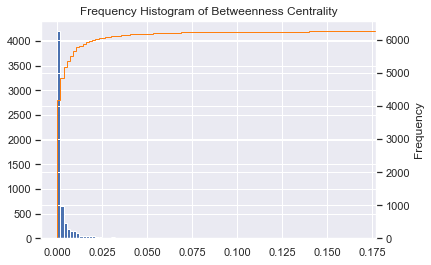

In [ ]:
# ====== Betweenness centrality
# ========== Define series
# target_column = gdf_edges_city_centrality['edge_bc_value_city']
target_column = gdf_edges_city_centrality['edge_bc_va']
print(target_column.describe())

# ========== Plot historgram + cumulative distribution
fig, ax = plt.subplots()
ax2 = ax.twinx()

n, bins, patches = ax.hist(target_column, bins=100
#                            , normed=False
                          )
n, bins, patches = ax2.hist(
    target_column, cumulative=1, histtype='step', bins=100, color='tab:orange')
ax.set_xlim((ax.get_xlim()[0], target_column.max())) # If to remove the vertical line,

# ========== Plot historgram
# plt.hist(target_column , bins=50)

# ========== Label
plt.gca().set(title='Frequency Histogram of Betweenness Centrality', xlabel= 'Betweenness centrality',ylabel='Frequency')
plt.show()

# ========== Save
# plt.savefig('test.png')

count    6262.000000
mean        0.028245
std         0.003982
min         0.000000
25%         0.025992
50%         0.028198
75%         0.030571
max         0.039456
Name: edge_cc_va, dtype: float64


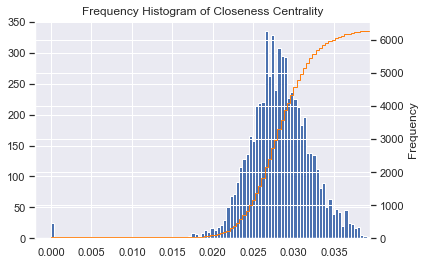

In [ ]:
# ====== Closeness centrality
# ========== Define series
# target_column = gdf_edges_city_centrality['edge_cc_value_city']
target_column = gdf_edges_city_centrality['edge_cc_va']
print(target_column.describe())

# ========== Plot historgram + cumulative distribution
fig, ax = plt.subplots()
ax2 = ax.twinx()

n, bins, patches = ax.hist(target_column, bins=100
#                            , normed=False
                          )
n, bins, patches = ax2.hist(
    target_column, cumulative=1, histtype='step', bins=100, color='tab:orange')
ax.set_xlim((ax.get_xlim()[0], target_column.max())) # If to remove the vertical line,

# ========== Plot historgram
# plt.hist(target_column , bins=50)

# ========== Label
plt.gca().set(title='Frequency Histogram of Closeness Centrality', xlabel= 'Closeness centrality',ylabel='Frequency')
plt.show()

# ========== Save
# plt.savefig('test.png')

count    6262.000000
mean        0.000471
std         0.000127
min         0.000095
25%         0.000378
50%         0.000473
75%         0.000568
max         0.000757
Name: edge_dc_va, dtype: float64


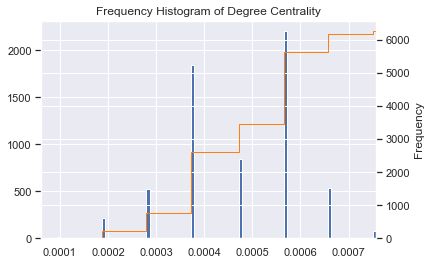

In [ ]:
# ====== Degree centrality
# ========== Define series
# target_column = gdf_edges_city_centrality['edge_dc_value_city']
target_column = gdf_edges_city_centrality['edge_dc_va']
print(target_column.describe())

# ========== Plot historgram + cumulative distribution
fig, ax = plt.subplots()
ax2 = ax.twinx()

n, bins, patches = ax.hist(target_column, bins=100
#                            , normed=False
                          )
n, bins, patches = ax2.hist(
    target_column, cumulative=1, histtype='step', bins=100, color='tab:orange')
ax.set_xlim((ax.get_xlim()[0], target_column.max())) # If to remove the vertical line,

# ========== Plot historgram
# plt.hist(target_column , bins=50)

# ========== Label
plt.gca().set(title='Frequency Histogram of Degree Centrality', xlabel= 'Degree centrality',ylabel='Frequency')
plt.show()

# ========== Save
# plt.savefig('test.png')

count    6262.000000
mean        0.000094
std         0.000021
min         0.000014
25%         0.000091
50%         0.000095
75%         0.000096
max         0.000252
Name: edge_pc_va, dtype: float64


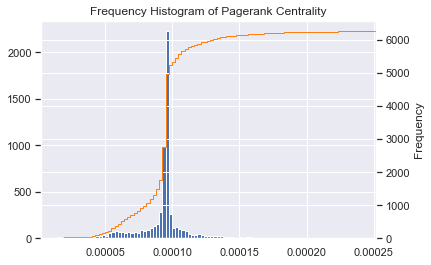

In [ ]:
# ====== Pagerank centrality
# ========== Define series
# target_column = gdf_edges_city_centrality['edge_pc_value_city']
target_column = gdf_edges_city_centrality['edge_pc_va']
print(target_column.describe())

# ========== Plot historgram + cumulative distribution
fig, ax = plt.subplots()
ax2 = ax.twinx()

n, bins, patches = ax.hist(target_column, bins=100
#                            , normed=False
                          )
n, bins, patches = ax2.hist(
    target_column, cumulative=1, histtype='step', bins=100, color='tab:orange')
ax.set_xlim((ax.get_xlim()[0], target_column.max())) # If to remove the vertical line,

# ========== Plot historgram
# plt.hist(target_column , bins=50)

# ========== Label
plt.gca().set(title='Frequency Histogram of Pagerank Centrality', xlabel= 'Pagerank centrality',ylabel='Frequency')
plt.show()

# ========== Save
# plt.savefig('test.png')

# 4. Clustering analysis_Hierarchical Clustering Analysis(HCA) without excluding deadend (Step 5)
https://bookdown.org/mpfoley1973/data-sci/hca.html

In [ ]:
# gdf_edges_city_centrality = gpd.read_file(
#     "C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220809_KMeans clustering include deadend/km_10cat.shp")

In [ ]:
subset = gdf_edges_city_centrality [[ 'edge_bc_va', 'edge_cc_va', 'edge_dc_va',  'edge_pc_va']]

### 4.1 Run Clustering without deciding number of clusters + Visualize results in order to decide number of clusters

##### 4.1.1 First way to run HCA using SKlearn
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

In [ ]:
# ===== Visualise results to decide number of clusters: https://github.com/scikit-learn/scikit-learn/issues/16701
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

0    2724
5    2297
4     910
1     246
3      63
2      22
Name: data, dtype: int64


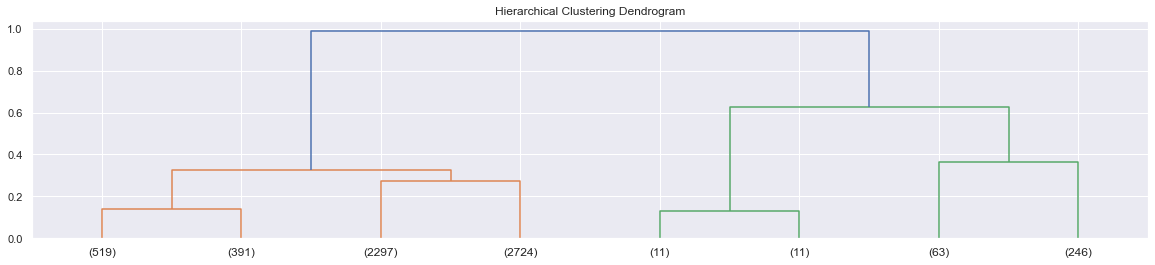

In [ ]:
# ===== Agglomerative Clustering "WITH" spedified number of clusters
# ===== !!!!Can't visualize dendrograme

X = subset
num_clusters = 6

# ==== setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(affinity='euclidean',linkage='ward',
                                n_clusters = num_clusters,  distance_threshold= None # If number of cluster is not decided
                               , compute_distances=True # AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_': https://stackoverflow.com/questions/61362625/agglomerativeclustering-no-attribute-called-distances
                               )
# ===== 進行預測:
model = model.fit(X)

# ##### list of cluster labels
agglomerative_labels_2 = model.fit_predict(X)

df_agglomerative_labels = pd.DataFrame({'data':agglomerative_labels_2})
print(df_agglomerative_labels['data'].value_counts())

# ====== plot the top three levels of the dendrogram
plt.figure(figsize=(20,4))
plot_dendrogram(            # Function was created in the above cell
                model,
#                 truncate_mode='lastp',
                truncate_mode='level',
                p = 2    # number of levels to be ploted
               )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("")
plt.show()

In [ ]:
# ===== Agglomerative Clustering without spedifying number of clusters
X = subset

# ==== setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(affinity='euclidean',linkage='ward',
                                n_clusters=None, distance_threshold=0,  # If number of cluster is not decided
                               )
# ===== 進行預測:
model = model.fit(X)

# ##### list of cluster labels
agglomerative_labels_1 = model.fit_predict(X)
print(agglomerative_labels_1)

# ====== plot the top three levels of the dendrogram
plt.figure(figsize=(20,4))
plot_dendrogram(            # Function was created in the above cell
                model,
                truncate_mode='lastp',
#                 truncate_mode='level',
                p = 6    # number of levels to be ploted
               )
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("")
plt.show()

MemoryError: Unable to allocate 8.60 GiB for an array with shape (1154329176,) and data type float64

##### 4.1.2 Second way to run HCA using SciPy

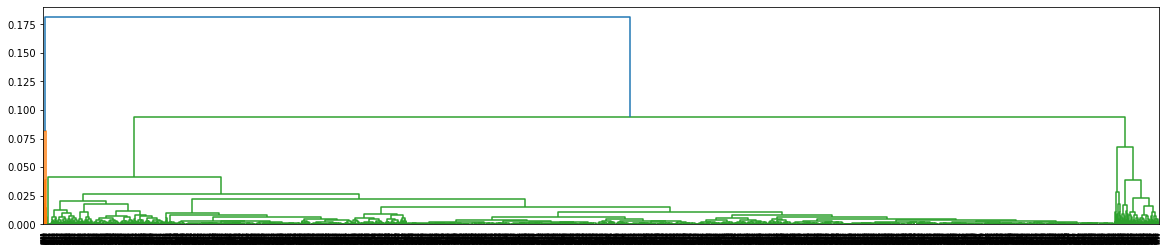

In [ ]:
from scipy.cluster import hierarchy
X = subset
Z = hierarchy.linkage(X, 'complete')
plt.figure(figsize=(20,4))
dn = hierarchy.dendrogram(Z)

In [ ]:
from scipy.cluster.hierarchy import complete, fcluster
from scipy.spatial.distance import pdist

X = subset
ydist = pdist(X)
Z = hierarchy.complete(ydist)
Z
# plt.figure(figsize=(20,4))
# dn = hierarchy.dendrogram(Z)

array([[4.75600000e+03, 4.75700000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.15100000e+03, 3.15200000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.12300000e+03, 5.12400000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.25150000e+04, 1.25170000e+04, 8.20055570e-02, 2.20000000e+01],
       [1.25180000e+04, 1.25190000e+04, 9.38445308e-02, 6.24000000e+03],
       [1.25200000e+04, 1.25210000e+04, 1.81130134e-01, 6.26200000e+03]])

### 4.2 Add cluster labels to gdf_edges

In [ ]:
#------Add a column of the clustering labels
gdf_edges_city_centrality['hc_6cat'] = agglomerative_labels_2
gdf_edges_city_centrality.columns

Index(['osmid', 'oneway', 'name', 'highway', 'length', 'speed_kph',
       'travel_tim', 'id_streets', 'value_stre', 'id_stree_1', 'value_st_1',
       'id_node_de', 'value_node', 'id_node__1', 'value_no_1', 'edge_cc_u_',
       'edge_cc_v_', 'edge_cc_va', 'edge_bc_u_', 'edge_bc_v_', 'edge_bc_va',
       'edge_dc_u_', 'edge_dc_v_', 'edge_dc_va', 'edge_pc_u_', 'edge_pc_v_',
       'edge_pc_va', 'edge_eic_u', 'edge_eic_v', 'edge_eic_1', 'from', 'to',
       'lanes', 'ref', 'maxspeed', 'width', 'est_width', 'bridge', 'junction',
       'tunnel', 'access', 'service', 'area', 'u', 'v', 'key', 'hc_lab_8ca',
       'NSC_8_hc', 'nuHighway', 'km_lab_8ca', 'NSC_8_km', 'NSC_10_km',
       'hc_lab_10c', 'NSC_10_hc', 'geometry', 'FCS', 'hc_6cat'],
      dtype='object')

In [ ]:
df_hc_6cat = pd.DataFrame({'data':gdf_edges_city_centrality['hc_6cat']})
print(df_hc_6cat['data'].value_counts())

0    2724
5    2297
4     910
1     246
3      63
2      22
Name: data, dtype: int64


# 5. Save file & visualize in QGIS

In [ ]:
gdf_edges.to_file("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_"+city_name+"/20220930_hc with deadend_6cat/hc_6cat.shp")

In [ ]:
# ===== Save graph to shape file and visualize the following figures in QGIS
#1. Supp figure 2 (select column "highway")
#2. Supp figure 4(select column "edge_bc_value_city", "edge_cc_value_city", "edge_dc_value_city", "edge_pc_value_city")
#3. Figure 2 (select column "str_class")
# G = ox.graph_from_gdfs(gdf_nodes, gdf_edges_city_centrality, graph_attrs=None)
# ox.io.save_graph_shapefile(G, filepath='./data/journal')

In [ ]:
# ===== Save gdf files to csv files ========================
# gdf_nodes.to_csv('./data/journal/gdf_nodes.csv'
#                  ,index=True, header=True, encoding="utf_8_sig", mode='a+')
# gdf_edges_city_centrality.to_csv('./data/journal/gdf_edges.csv'
#                 ,index=True, header=True, encoding="utf_8_sig", mode='a+')

# 6. Relable clusters

In [ ]:
# gdf_edges_city_centrality = gpd.read_file(
#     'C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220930_hc with deadend_6cat/hc_6cat.shp'
# )

In [ ]:
# ====== Relabel class (This step varies depending on the results of clustering)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['hc_6cat']==0,'NSC_6_hc'] = int(6)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['hc_6cat']==1,'NSC_6_hc'] = int(3)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['hc_6cat']==2,'NSC_6_hc'] = int(1)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['hc_6cat']==3,'NSC_6_hc'] = int(2)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['hc_6cat']==4,'NSC_6_hc'] = int(4)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['hc_6cat']==5,'NSC_6_hc'] = int(5)

# ===== Select deadend to be a seperate category
# gdf_edges_city_centrality.loc[(gdf_edges_city_centrality['NSC_8_hc']==5) &
#                                (gdf_edges_city_centrality['value_stre'] != 1),'str_class'] = int(6)

gdf_edges_city_centrality['NSC_6_hc'].value_counts()

6.0    2724
5.0    2297
4.0     910
3.0     246
2.0      63
1.0      22
Name: NSC_6_hc, dtype: int64

In [ ]:
# ===== Save
gdf_edges_city_centrality.to_file("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220930_hc with deadend_6cat/hc_6cat.shp")
gdf_edges_city_centrality.columns

Index(['osmid', 'oneway', 'name', 'highway', 'length', 'speed_kph',
       'travel_tim', 'id_streets', 'value_stre', 'id_stree_1', 'value_st_1',
       'id_node_de', 'value_node', 'id_node__1', 'value_no_1', 'edge_cc_u_',
       'edge_cc_v_', 'edge_cc_va', 'edge_bc_u_', 'edge_bc_v_', 'edge_bc_va',
       'edge_dc_u_', 'edge_dc_v_', 'edge_dc_va', 'edge_pc_u_', 'edge_pc_v_',
       'edge_pc_va', 'edge_eic_u', 'edge_eic_v', 'edge_eic_1', 'from', 'to',
       'lanes', 'ref', 'maxspeed', 'width', 'est_width', 'bridge', 'junction',
       'tunnel', 'access', 'service', 'area', 'u', 'v', 'key', 'hc_lab_8ca',
       'NSC_8_hc', 'nuHighway', 'km_lab_8ca', 'NSC_8_km', 'NSC_10_km',
       'hc_lab_10c', 'NSC_10_hc', 'geometry', 'FCS', 'hc_6cat', 'NSC_6_hc'],
      dtype='object')

In [ ]:
# ===== count the number of occurrences of none in a list
count_none= ['highway', 'nuHighway','maxspeed', 'width', 'est_width', 'service', 'area' ]
for i in range (0, len(count_none)):
    lst = gdf_edges_city_centrality[count_none[i]]
#     print(len(lst) - lst.count(None)) # 1st way
#     print(sum(x is None for x in lst)) # 2nd way
    print (sum(1 for i in lst if i == None)) # 3rd way

0
23
1413
6147
6223
6261
6243


# ===============================================

# 7.1 Descriptive stats of centralities within clusters_HCA  (New paper: Table 1 & Figure 2 )(Old paper: Figure 1 &Table 2)

In [ ]:
# gdf_edges_city_centrality = gpd.read_file(
#     "C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220930_hc with deadend_6cat/hc_6cat.shp"
# )
# len(gdf_edges_city_centrality), gdf_edges_city_centrality.columns

(6262,
 Index(['osmid', 'oneway', 'name', 'highway', 'length', 'speed_kph',
        'travel_tim', 'id_streets', 'value_stre', 'id_stree_1', 'value_st_1',
        'id_node_de', 'value_node', 'id_node__1', 'value_no_1', 'edge_cc_u_',
        'edge_cc_v_', 'edge_cc_va', 'edge_bc_u_', 'edge_bc_v_', 'edge_bc_va',
        'edge_dc_u_', 'edge_dc_v_', 'edge_dc_va', 'edge_pc_u_', 'edge_pc_v_',
        'edge_pc_va', 'edge_eic_u', 'edge_eic_v', 'edge_eic_1', 'from', 'to',
        'lanes', 'ref', 'maxspeed', 'width', 'est_width', 'bridge', 'junction',
        'tunnel', 'access', 'service', 'area', 'u', 'v', 'key', 'hc_lab_8ca',
        'NSC_8_hc', 'nuHighway', 'km_lab_8ca', 'NSC_8_km', 'NSC_10_km',
        'hc_lab_10c', 'NSC_10_hc', 'geometry'],
       dtype='object'))

In [ ]:
df_subset = gdf_edges_city_centrality [[ 'edge_bc_va', 'edge_cc_va', 'edge_dc_va',  'edge_pc_va', 'length',  'speed_kph', 'NSC_6_hc']]

In [ ]:
# ===== Descriptive Statistics
dataSet_des_stats = df_subset
df_descriptive = pd.DataFrame()
num_clusters = 6

for i in range(1, num_clusters+1):  # Depending on how many clusters
    globals()["df_cluster_" + str(i)]= dataSet_des_stats.loc[dataSet_des_stats['NSC_6_hc'] == i]
    for j in range(0, (len(dataSet_des_stats.columns)-1)):
        df_descriptive.loc[dataSet_des_stats.columns[j], 'mean_all'] = dataSet_des_stats[dataSet_des_stats.columns[j]].describe()['mean']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'std_all'] = dataSet_des_stats[dataSet_des_stats.columns[j]].describe()['std']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'mean_cluster_'+str(i)] =  globals()["df_cluster_" + str(i)][globals()["df_cluster_" + str(i)].columns[j]].describe()['mean']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'std_cluster_'+str(i)] =  globals()["df_cluster_" + str(i)][globals()["df_cluster_" + str(i)].columns[j]].describe()['std']
df_descriptive

,mean_all,std_all,mean_cluster_1,std_cluster_1,mean_cluster_2,std_cluster_2,mean_cluster_3,std_cluster_3,mean_cluster_4,std_cluster_4,mean_cluster_5,std_cluster_5,mean_cluster_6,std_cluster_6
edge_bc_va,0.004147,0.011594,0.132593,0.023890,0.063430,0.011058,0.027296,0.007710,0.008724,0.003667,0.000988,0.001218,0.000782,0.001006
edge_cc_va,0.028245,0.003982,0.036228,0.002198,0.035146,0.002340,0.032688,0.003220,0.030258,0.003011,0.030493,0.001920,0.025051,0.003164
edge_dc_va,0.000471,0.000127,0.000301,0.000091,0.000354,0.000120,0.000433,0.000140,0.000455,0.000122,0.000472,0.000127,0.000484,0.000124
edge_pc_va,0.000094,0.000021,0.000158,0.000055,0.000101,0.000040,0.000098,0.000029,0.000096,0.000026,0.000092,0.000020,0.000093,0.000016
length,137.870766,188.086505,884.178227,643.557590,406.754825,461.612639,271.592610,325.096161,177.284282,269.867441,119.038947,126.273249,116.261498,130.216693
speed_kph,38.928713,12.615757,79.090909,4.264014,67.668254,16.235543,56.619106,14.738003,47.294176,10.842591,37.230344,10.917953,34.979589,9.933575


In [ ]:
# df_descriptive.to_csv('./data/journal/Tab2_descriptive_indicators.csv', index=True, encoding='utf-8')
df_descriptive.to_csv("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220930_hc with deadend_6cat/descriptive_indicators_6cat.csv", index=True, encoding='utf-8')

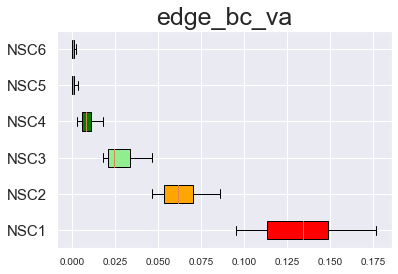

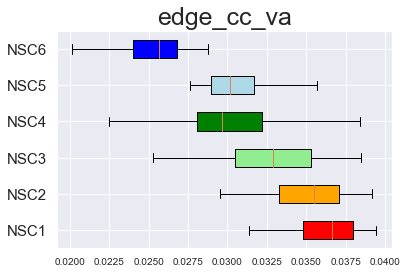

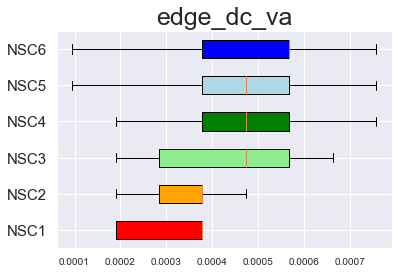

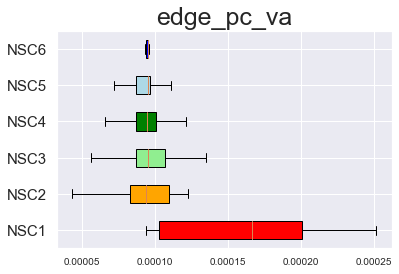

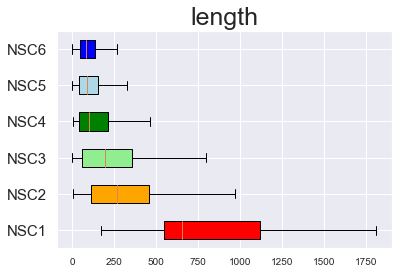

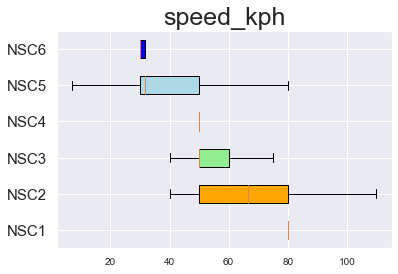

In [ ]:
# ===== Boxplot
dataSet_des_stats = df_subset
num_clusters = 6
num_target_variable = 2 # Choose how many target variables to rund descriptive stats
boxplot_labels = []
for i in range (1, num_clusters+1):
    boxplot_labels.append("NSC" + str(i))

for i in range(0, (len(dataSet_des_stats.columns)-1)): # -1 to remove the columns of 'cluster_label'
    boxplot_list = []
    dataSet_boxplot =  dataSet_des_stats[['NSC_6_hc', dataSet_des_stats.columns[i]]] #Select the columns of target variable and cluster labels from dataSet
    for j in range(1, num_clusters+1): #Break the variable values by cluster labels
        globals()["df_cluster_" + str(j)] = dataSet_boxplot.loc[dataSet_boxplot['NSC_6_hc'] == j] #Choose the rows with target cluster labels
        globals()["var_value_in_cluster_" + str(j)] = globals()["df_cluster_" + str(j)][dataSet_des_stats.columns[i]] # Choose column of target variable
        boxplot_list.append(globals()["var_value_in_cluster_" + str(j)])# List of values of target variable in each cluster

    box = plt.boxplot(boxplot_list, labels = boxplot_labels, vert=0, patch_artist=True
                    , showfliers=False
                    )

    colors = ['red', 'orange','lightgreen','green','lightblue', 'blue',   'plum', 'purple']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xticks(size =10)
    plt.yticks(size =15)
    plt.title(dataSet_des_stats.columns[i], size = 25)
#     plt.savefig("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/box_plot_NSC_"+dataSet_des_stats.columns[i]+".png")
    plt.show()

# 7.2 Descriptive stats of centralities within each FCS

In [ ]:
# ===== Descriptive Statistic
dataSet_des_stats = gdf_edges_city_centrality [[ 'edge_bc_va', 'edge_cc_va', 'edge_dc_va',  'edge_pc_va', 'length',  'speed_kph', 'FCS']]
df_descriptive = pd.DataFrame()
num_clusters = 6

for i in range(1, num_clusters+1):  # Depending on how many clusters
    globals()["df_cluster_" + str(i)]= dataSet_des_stats.loc[dataSet_des_stats['FCS'] == i]
    for j in range(0, (len(dataSet_des_stats.columns)-1)):
        df_descriptive.loc[dataSet_des_stats.columns[j], 'mean_all'] = dataSet_des_stats[dataSet_des_stats.columns[j]].describe()['mean']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'std_all'] = dataSet_des_stats[dataSet_des_stats.columns[j]].describe()['std']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'mean_FCS_'+str(i)] =  globals()["df_cluster_" + str(i)][globals()["df_cluster_" + str(i)].columns[j]].describe()['mean']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'std_FCS_'+str(i)] =  globals()["df_cluster_" + str(i)][globals()["df_cluster_" + str(i)].columns[j]].describe()['std']
df_descriptive

,mean_all,std_all,mean_FCS_1,std_FCS_1,mean_FCS_2,std_FCS_2,mean_FCS_3,std_FCS_3,mean_FCS_4,std_FCS_4,mean_FCS_5,std_FCS_5,mean_FCS_6,std_FCS_6
edge_bc_va,0.004147,0.011594,0.028504,0.037900,0.010556,0.010247,0.008792,0.011601,0.004729,0.006507,0.000941,0.001958,0.002091,0.004341
edge_cc_va,0.028245,0.003982,0.031618,0.008891,0.030438,0.003187,0.030123,0.003364,0.028445,0.003313,0.027417,0.003301,0.028512,0.004991
edge_dc_va,0.000471,0.000127,0.000271,0.000090,0.000408,0.000105,0.000435,0.000115,0.000500,0.000119,0.000492,0.000118,0.000444,0.000122
edge_pc_va,0.000094,0.000021,0.000085,0.000045,0.000094,0.000030,0.000095,0.000027,0.000094,0.000019,0.000094,0.000015,0.000093,0.000020
length,137.870766,188.086505,360.756580,433.010214,131.364434,212.330841,137.793727,225.739893,146.067067,229.331457,118.446719,108.310805,159.394583,222.338142
speed_kph,38.928713,12.615757,72.644523,14.068969,51.123596,5.356088,49.424729,5.265915,46.737600,9.862838,31.988872,5.565387,42.195238,8.859042


In [ ]:
df_descriptive.to_csv("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220930_hc with deadend_6cat/descriptive_indicators_FCS.csv", index=True, encoding='utf-8')

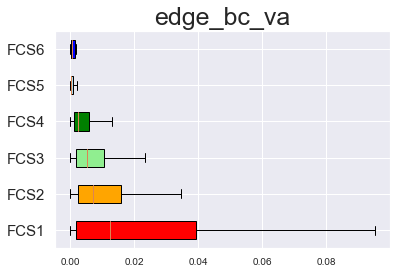

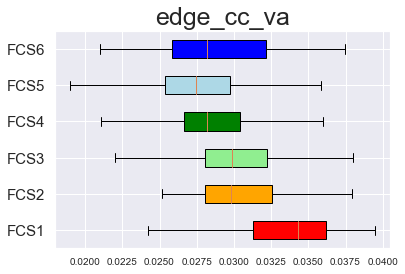

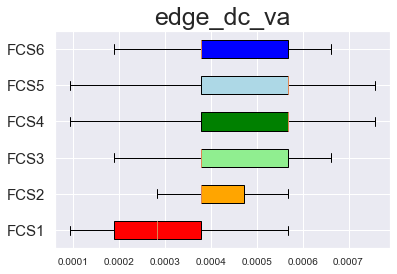

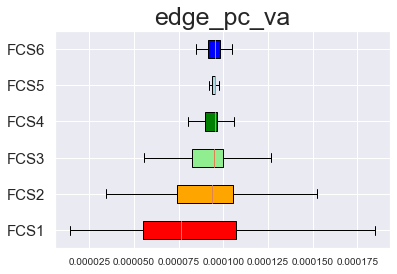

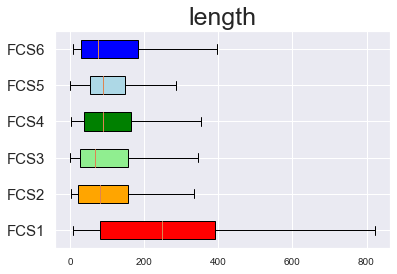

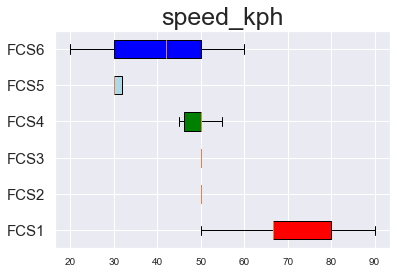

In [ ]:
# ===== Boxplot
dataSet_des_stats = gdf_edges_city_centrality [[ 'edge_bc_va', 'edge_cc_va', 'edge_dc_va',  'edge_pc_va', 'length',  'speed_kph', 'FCS']]
num_clusters = 6
num_target_variable = 2 # Choose how many target variables to rund descriptive stats
boxplot_labels = []
for i in range (1, num_clusters+1):
    boxplot_labels.append("FCS" + str(i))

for i in range(0, (len(dataSet_des_stats.columns)-1)): # -1 to remove the columns of 'cluster_label'
    boxplot_list = []
    dataSet_boxplot =  dataSet_des_stats[['FCS', dataSet_des_stats.columns[i]]] #Select the columns of target variable and cluster labels from dataSet
    for j in range(1, num_clusters+1): #Break the variable values by cluster labels
        globals()["df_cluster_" + str(j)] = dataSet_boxplot.loc[dataSet_boxplot['FCS'] == j] #Choose the rows with target cluster labels
        globals()["var_value_in_cluster_" + str(j)] = globals()["df_cluster_" + str(j)][dataSet_des_stats.columns[i]] # Choose column of target variable
        boxplot_list.append(globals()["var_value_in_cluster_" + str(j)])# List of values of target variable in each cluster

    box = plt.boxplot(boxplot_list, labels = boxplot_labels, vert=0, patch_artist=True
                    , showfliers=False
                    )

    colors = ['red', 'orange','lightgreen','green','lightblue', 'blue',   'plum', 'purple']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xticks(size =10)
    plt.yticks(size =15)
    plt.title(dataSet_des_stats.columns[i], size = 25)
#     plt.savefig("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/box_plot_NSC_"+dataSet_des_stats.columns[i]+".png")
    plt.show()

# 8. Mis-match between FCS & NSC(Table 2a & Figure 4 in final paper.) (Figure 3 & Supp table 2 in old paper)<br>
How many FCS in NSC? How many NSC in FCS? <br>
Create an indicator to measure the difference between FCS & NSC

In [ ]:
# ===== Number of segments in each functional class
# # ===== Select specific sector
df_hway_0 = pd.Series()
dataSet_des_stats = gdf_edges_city_centrality[['nuHighway', 'NSC_6_hc']]
sss = dataSet_des_stats['NSC_6_hc'].replace(100, 4) # Assign new kmeans_label to deadend
num_clusters = len(gdf_edges_city_centrality['NSC_6_hc'].value_counts().index)

lab = []
for k in range (1, num_clusters+1):
    lab.append("NSC_"+ str(k))

for i in range (1, num_clusters+1):
    hw1= dataSet_des_stats.loc[dataSet_des_stats['NSC_6_hc'] == i]
    hw2 = hw1['nuHighway'].value_counts() # count number of segments in each functional class
    df_hway_0 = pd.concat([df_hway_0,  hw2], axis=1)

# ===== Change column name
    df_hway_0.rename({'nuHighway': 'NSC_'+ str(i)}, inplace=True, axis='columns')

# ===== Fill Nan with 0
df_hway_0= df_hway_0.fillna(0)

# ===== Drop the first column
df_hway_0.drop(0, inplace=True, axis=1)

# ===== Change the order of row
df_hway_0 = df_hway_0.reindex(["motorway", "primary", "secondary","tertiary", "residential","unclassified"])

df_hway_0

<ipython-input-47-54e98fd9cde8>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_hway_0 = pd.Series()


,NSC_1,NSC_2,NSC_3,NSC_4,NSC_5,NSC_6
motorway,22.0,39.0,66,52,72,32
primary,0.0,0.0,60,110,54,43
secondary,0.0,19.0,71,377,239,123
tertiary,0.0,2.0,35,212,203,298
residential,0.0,0.0,10,148,1678,2190
unclassified,0.0,0.0,1,9,43,31


In [ ]:
# df_hway_0.to_csv('./data/journal/Supp tab2.csv', index=True, encoding='utf-8')
df_hway_0.to_csv("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220930_hc with deadend_6cat/Supp tab2.csv", index=True, encoding='utf-8')

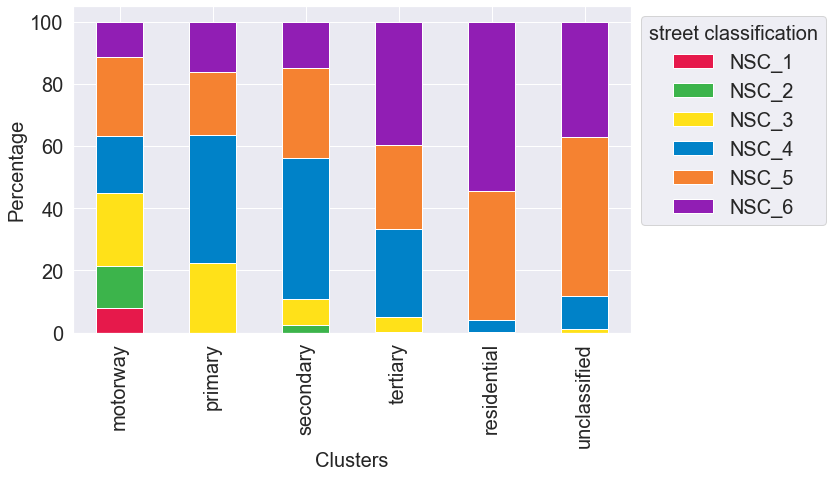

C:\Users\a\Anaconda\envs\ox\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


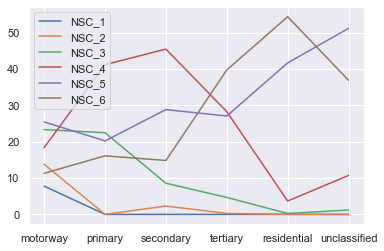

In [ ]:
# ===== Percentage of cluster within each hway type
data_stack_bar = df_hway_0

# ===== types of highway within each cluster
types_highway = len(data_stack_bar.index)
num_df_hway_clmn = len(data_stack_bar.columns)
num_cluster = len(gdf_edges_city_centrality['NSC_6_hc'].value_counts().index)

snum = 0
for j in range(0, num_cluster):
        globals()["y" + str(j)] = data_stack_bar.iloc[:, j]
        snum = snum + globals()["y" + str(j)]

# # ===== normalization
for j in range(0, num_cluster):
        globals()["y" + str(j)] = globals()["y" + str(j)]/snum*100
#=================================
data_keys =[]
data_values =[]
# data = {}
for i in range(0, num_cluster):
    d_k =  data_stack_bar.columns[i]
    d_v =  globals()["y" + str(i)]
    data_keys.append(d_k)
    data_values.append(d_v)
data_keys
data_values

data = dict(zip(data_keys, data_values))
data

#================

X_AXIS = data_stack_bar.index

color_list = [
#              "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0","#f032e6",
#              '#9418e6','#16914c' ,'#ff7f00','#4682b4','#e31a1c','#7cbcee','#f299a9','#90ee90',
#              'cyan', 'lightblue', 'lightgreen', 'tan', 'yellow', 'orange', 'pink', "steelblue",

              "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0","#f032e6"
             , "#d2f53c", "#fabebe", "#008080", "#e6beff", "#aa6e28", "#fffac8", "#800000", "#aaffc3"
             , "#808000", "#ffd8b1", "#000080", "#808080", "#ffffff", "#000000"

             ]

index = pd.Index(X_AXIS, name='Clusters')
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6)
             , color = color_list
            )
ax.set_xlabel('Clusters', fontsize = 20)
ax.set_ylabel('Percentage', fontsize =20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(
            title='street classification', title_fontsize='20',
           bbox_to_anchor=(1.0, 1), loc='upper left', fontsize = 20
          )

# ====== Save
# # plt.savefig('stacked.png')  # if needed
# plt.savefig("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/NSC_in_function.png"
#            ,bbox_inches='tight', dpi=300)

plt.show()

# ===== Plot line chart
df_line =  pd.DataFrame(
    data
)
lines = df_line.plot.line()

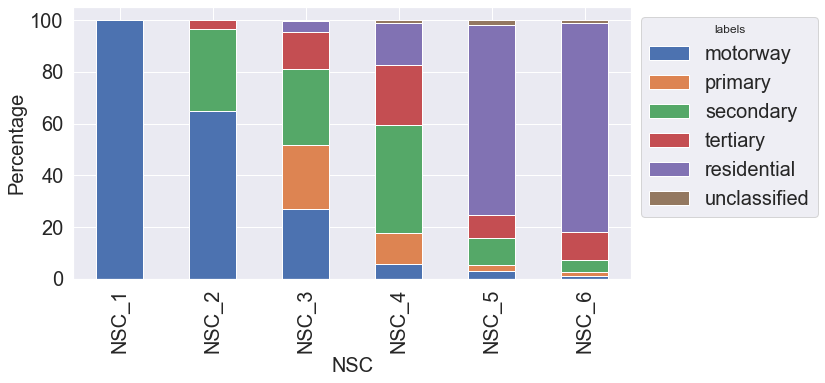

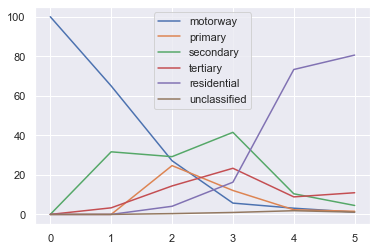

In [ ]:
# ===== Percentage of highway type within each cluster

data_stack_bar = df_hway_0

types_highway = len(data_stack_bar.index)     #"unclassified" is included
#types_highway = len(data_stack_bar.index)-1  #"unclassified" is excluded

num_df_hway_clmn = len(data_stack_bar.columns)

# ===== Sum of each column
snum = 0
for j in range(0, types_highway):
        globals()["y" + str(j)] = data_stack_bar.values[j]
        snum = snum + globals()["y" + str(j)]

# # ===== normalization: percentate of highway type within each cluster
for j in range(0, types_highway):
        globals()["y" + str(j)] = globals()["y" + str(j)]/snum*100

#=====Create a dataset with percentage of highway type within each cluster
data_keys =[]
data_values =[]
for i in range(0, types_highway):
    d_k =  data_stack_bar.index[i]
    d_v =  globals()["y" + str(i)]
    data_keys.append(d_k)
    data_values.append(d_v)
data_keys
data_values

data_percentage_hway_in_cluster = dict(zip(data_keys, data_values))

#===== Plot Percentage stacked bar chart===========

X_AXIS = data_stack_bar.columns

color_list = [
             "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0","#f032e6"
            , "#d2f53c", "#fabebe", "#008080", "#e6beff", "#aa6e28", "#fffac8", "#800000", "#aaffc3"
            , "#808000", "#ffd8b1", "#000080", "#808080", "#ffffff", "#000000"
            ]

index = pd.Index(X_AXIS, name='Clusters')
df = pd.DataFrame(data_percentage_hway_in_cluster, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 5),
#              color = color_list
            )
ax.set_xlabel('NSC', fontsize = 20)
ax.set_ylabel('Percentage', fontsize =20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left', fontsize =20)

# ==== Save
# plt.savefig('stacked.png')  # if needed
# plt.savefig("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/function_in_NSC.png"
#            ,bbox_inches='tight', dpi=300)
# plt.gcf().set_size_inches(10,5)
# plt.tight_layout()
# plt.gca().set_position([0, 0, 1, 1])

plt.show()

# ===== Plot line chart
df_line =  pd.DataFrame(
    data_percentage_hway_in_cluster
)
lines = df_line.plot.line()

# 9. Culmulative distribution of frequency (CDF) of number of segments (Not included in final paper)

      FCS
3556  1.0
684   1.0
2775  1.0
3052  1.0
3053  1.0
...   ...
4641  NaN
4687  NaN
4707  NaN
5450  NaN
5535  NaN

[6262 rows x 1 columns]
     frequency
FCS           
1.0        283
2.0        267
3.0        829
4.0        750
5.0       4026
6.0         84
     frequency       pdf       cdf
FCS                               
1.0        283  0.045360  0.045360
2.0        267  0.042795  0.088155
3.0        829  0.132874  0.221029
4.0        750  0.120212  0.341241
5.0       4026  0.645296  0.986536
6.0         84  0.013464  1.000000
   FCS  frequency       pdf       cdf
0  1.0        283  0.045360  0.045360
1  2.0        267  0.042795  0.088155
2  3.0        829  0.132874  0.221029
3  4.0        750  0.120212  0.341241
4  5.0       4026  0.645296  0.986536
5  6.0         84  0.013464  1.000000


<AxesSubplot:xlabel='FCS'>

<Figure size 432x288 with 0 Axes>

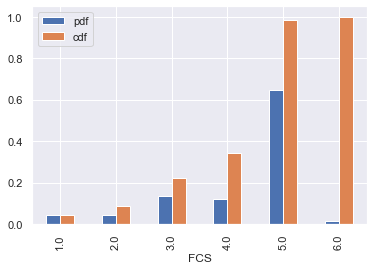

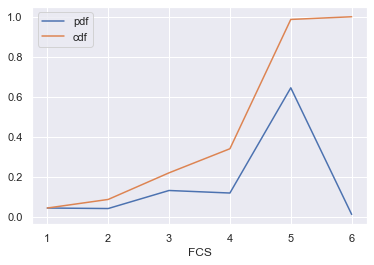

In [ ]:
# ===== FCS
col_name = 'FCS'
dataSet = gdf_edges_city_centrality
fig = plt.figure()

# ===== Define the series and create dataframe
df_cumulative = pd.DataFrame(data=pd.Series(dataSet[col_name].values).sort_values(), columns=[col_name])
print(df_cumulative)

# ===== Get the frequency, PDF and CDF for each value in the series
# ========== Frequency
stats_df = df_cumulative \
    .groupby(col_name) \
    [col_name] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {col_name: 'frequency'})
print(stats_df)

# ========== PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# ========== CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
print(stats_df)

stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
print(stats_df)

# ===== Plot discrete distributions
stats_df.plot.bar(x = col_name, y = ['pdf', 'cdf'], grid = True)

# ===== Plot cumulative / continuous distribution
stats_df.plot(x = col_name, y = ['pdf', 'cdf'], grid = True)

          frequency
NSC_6_hc           
1.0              22
2.0              63
3.0             246
4.0             910
5.0            2297
6.0            2724


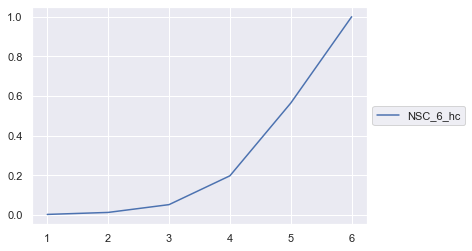

In [ ]:
# ===== NSC_HCA
dataSet_des_stats = gdf_edges_city_centrality
col_name = ['NSC_6_hc']  #Match result of 80/20
fig = plt.figure()
ax = fig.add_subplot(111)
dict1 = {}
dict2 = {}

for i in range(0, len(col_name)):
    df_cumulative = pd.DataFrame(data=pd.Series(dataSet[col_name[i]].values).sort_values(), columns=[col_name[i]])

    stats_df = df_cumulative \
        .groupby(col_name[i]) \
        [col_name[i]] \
        .agg('count') \
        .pipe(pd.DataFrame) \
        .rename(columns = {col_name[i]: 'frequency'})
    print(stats_df)
    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ col_name[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ col_name[i]]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

#     df1=df1.append(stats_df1,ignore_index=True) ####Vertically adding cases #https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
#     df2=df2.append(stats_df2,ignore_index=True) ####Vertical adding rows
#     df3[ cities[i] + '_' + str(i)] = stats_df2 #####Horizonally adding columns

#     ar1.append(stats_df2)

    #####=======Plot=======================
    ax.plot(dict1[i][col_name],dict1[i]['cdf'+'_'+ col_name[i]], label = col_name[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

(0.7499999999999999, 6.0)

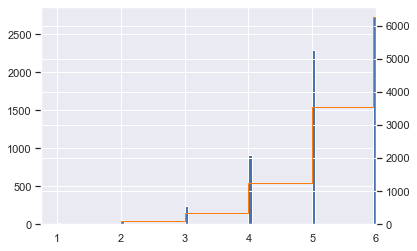

In [ ]:
# ===== NSC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

col_name = 'NSC_6_hc'
dataSet = gdf_edges_city_centrality
series = pd.Series(dataSet[col_name].values)

fig, ax = plt.subplots()
ax2 = ax.twinx()

n, bins, patches = ax.hist(series, bins=100
#                            , normed=False
                          )
n, bins, patches = ax2.hist(
    series, cumulative=1, histtype='step', bins=100, color='tab:orange')
ax.set_xlim((ax.get_xlim()[0], series.max())) # If to remove the vertical line,
# plt.savefig('test.png')

     frequency       pdf   cdf_FCS       cdf
FCS                                         
1.0        283  0.045360  0.045360  0.045360
2.0        267  0.042795  0.088155  0.088155
3.0        829  0.132874  0.221029  0.221029
4.0        750  0.120212  0.341241  0.341241
5.0       4026  0.645296  0.986536  0.986536
6.0         84  0.013464  1.000000  1.000000
          frequency       pdf  cdf_NSC_6_hc       cdf
NSC_6_hc                                             
1.0              22  0.003513      0.003513  0.003513
2.0              63  0.010061      0.013574  0.013574
3.0             246  0.039285      0.052859  0.052859
4.0             910  0.145321      0.198179  0.198179
5.0            2297  0.366816      0.564995  0.564995
6.0            2724  0.435005      1.000000  1.000000


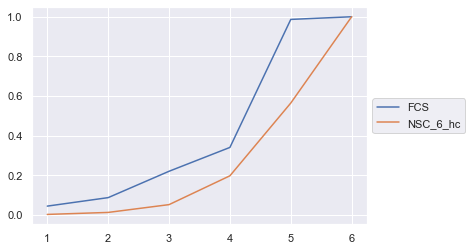

In [ ]:
# ===== Compare FCS and NSC
col_name = ['FCS', 'NSC_6_hc']
dataSet = gdf_edges_city_centrality[col_name]
fig = plt.figure()
ax = fig.add_subplot(111)
dict1 = {}
dict2 = {}

# df1 = pd.DataFrame()
# df2 = pd.DataFrame()
# df3 = pd.DataFrame()
# ar1=[]

for i in range(0, len(col_name)):
    df_cumulative = pd.DataFrame(
                        data = pd.Series(
                                    dataSet[col_name[i]].values).sort_values(),
                                     columns=[col_name[i]]
                                       )
    stats_df = df_cumulative \
        .groupby(col_name[i]) \
        [col_name[i]] \
        .agg('count') \
        .pipe(pd.DataFrame) \
        .rename(columns = {col_name[i]: 'frequency'})


    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ col_name[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    print(stats_df)

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ col_name[i]]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

#     df1=df1.append(stats_df1,ignore_index=True) ####Vertically adding cases #https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
#     df2=df2.append(stats_df2,ignore_index=True) ####Vertical adding rows
#     df3[ cities[i] + '_' + str(i)] = stats_df2 #####Horizonally adding columns
#     ar1.append(stats_df2)
    #####=======Plot=======================
    ax.plot(dict1[i][col_name[i]], dict1[i]['cdf'+'_'+ col_name[i]], label = col_name[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# ===== 1st way : Using scipy.stats.ks_2samp to compare the distributions
from scipy.stats import ks_2samp
import numpy as np

dataSet = gdf_edges_city_centrality
series_0 = dataSet['FCS'].values
series_1 = dataSet['NSC_6_hc'].values
ks  = ks_2samp(series_0,series_1)
print(f"FCS vs NSC: ks = {ks.statistic:.4f} (p-value = {ks.pvalue:.3e}, are equal = {ks.pvalue > 0.05})")


FCS vs NSC: ks = 0.4179 (p-value = 0.000e+00, are equal = False)


NameError: name 'norm_a' is not defined

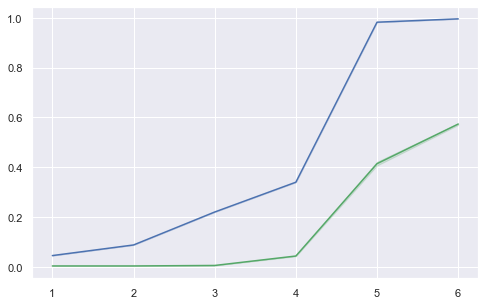

In [ ]:
# Creates their CDFs for visualization
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

dataSet = gdf_edges_city_centrality
series_0 = dataSet['FCS'].values
series_1 = dataSet['NSC_6_hc'].values

# cdf(series_0, series_0.mean())

cdf_norm_a = np.array([cdf(series_0, x, sort = True) for x in series_0])
cdf_norm_b = np.array([cdf(series_1, x, sort = True) for x in series_0])

Text(0.5, 1.0, 'Kolmogorov-Smirnov Test')

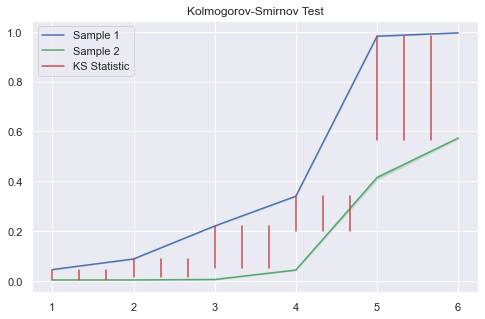

In [ ]:
# Illustrating the KS Statistic
plt.figure(figsize = (8,5))
sns.lineplot(x = series_0, y = cdf_norm_a, color = 'b')
sns.lineplot(x = series_1, y = cdf_norm_b, color = 'g')
min_x = int(min(min(series_0), min(series_1)))
max_x = int(max(max(series_0), max(series_1)))
for i in range(min_x * 3, max_x * 3):
    j = i/3
    plt.plot([j, j], [cdf(series_0, j), cdf(series_1, j)], color = 'r')
plt.legend(["Sample 1", "Sample 2", "KS Statistic"])
plt.title("Kolmogorov-Smirnov Test")

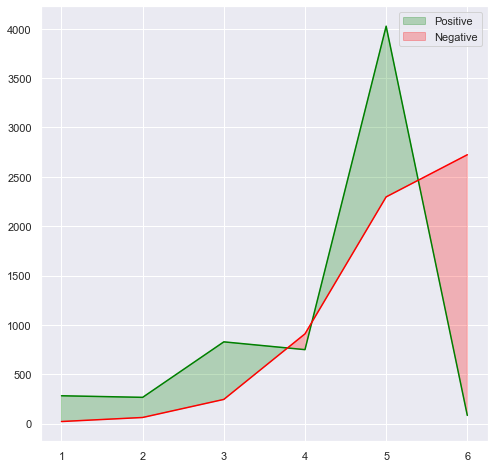

In [ ]:

df_cumlative_witn_diff = pd.DataFrame()
col_name = ['FCS', 'NSC_6_hc']
dataSet = gdf_edges_city_centrality[col_name]
for i in range (0, len(col_name)):
    df_cumulative = pd.DataFrame(
                        data = pd.Series(
                                    dataSet[col_name[i]].values).sort_values(),
                                     columns=[col_name[i]]
                                       )

    stats_df = df_cumulative \
            .groupby(col_name[i]) \
            [col_name[i]] \
            .agg('count') \
            .pipe(pd.DataFrame) \
            .rename(columns = {col_name[i]: 'frequency'})
#     print(stats_df['frequency'].values)
    df_cumlative_witn_diff[col_name[i]] = stats_df['frequency'].values

# ===== Plot
time = [1, 2, 3, 4, 5, 6]
income = df_cumlative_witn_diff[col_name[0]]
expenses = df_cumlative_witn_diff[col_name[1]]
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot lines

ax.plot(time, income, color="green")
ax.plot(time, expenses, color="red")

# Fill area when income > expenses with green
ax.fill_between(
    time, income, expenses, where=(income > expenses),
    interpolate=True, color="green", alpha=0.25,
    label="Positive"
)

# Fill area when income <= expenses with red
ax.fill_between(
    time, income, expenses, where=(income <= expenses),
    interpolate=True, color="red", alpha=0.25,
    label="Negative"
)

ax.legend();


# df_cumlative_witn_diff['diff'] = df_cumlative_witn_diff[col_name[0]] - df_cumlative_witn_diff[col_name[1]]
# df_cumlative_witn_diff

# 10.1 Cumulative distribution of frequency (CDF) of centrality of FCS (Not included in final paper)

In [ ]:
gdf_edges_city_centrality = gpd.read_file(
    "C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" + city_name +"/20220930_hc with deadend_6cat/hc_6cat.shp"
                )
gdf_edges_city_centrality.columns

Index(['osmid', 'oneway', 'name', 'highway', 'length', 'speed_kph',
       'travel_tim', 'bearing_ca', 'id_streets', 'value_stre', 'id_stree_1',
       'value_st_1', 'edge_cc_u_', 'edge_cc_v_', 'edge_cc_va', 'edge_bc_u_',
       'edge_bc_v_', 'edge_bc_va', 'edge_dc_u_', 'edge_dc_v_', 'edge_dc_va',
       'edge_eic_u', 'edge_eic_v', 'edge_eic_1', 'edge_pc_u_', 'edge_pc_v_',
       'edge_pc_va', 'from', 'to', 'access', 'lanes', 'bridge', 'ref',
       'tunnel', 'maxspeed', 'service', 'junction', 'width', 'area', 'u', 'v',
       'key', 'nuHighway', 'FCS', 'hc_6cat', 'NSC_6_hc', 'geometry'],
      dtype='object')

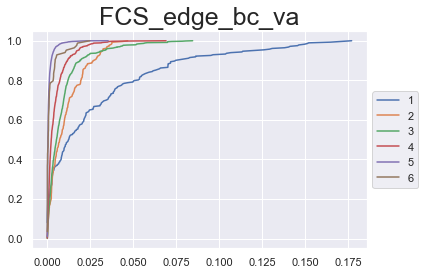

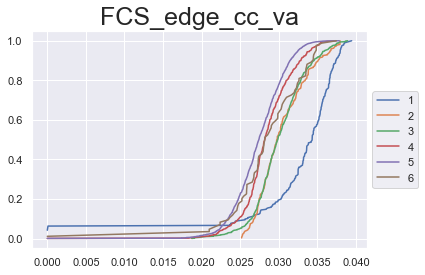

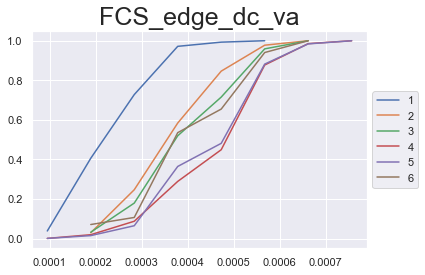

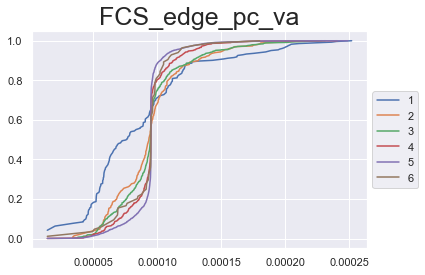

In [ ]:
dataSet = gdf_edges_city_centrality
col_name = 'FCS'
dataIndex = [1, 2, 3, 4, 5, 6]
cen  = ['edge_bc_va', 'edge_cc_va', 'edge_dc_va', 'edge_pc_va']

dict1 = {}
dict2 = {}

# ===== Betweenness centrality
for j in range(0, len(cen)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(0, len(dataIndex)):
        df_cumulative  = dataSet.loc[dataSet[col_name] == dataIndex[i]]
        df_bc = pd.DataFrame(data=pd.Series(df_cumulative[cen[j]].values).sort_values(), columns=['bc'])

        stats_df = df_bc \
        .groupby('bc') \
        ['bc'] \
        .agg('count') \
        .pipe(pd.DataFrame) \
        .rename(columns = {'bc': 'frequency'})

        #### PDF
        stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

        ##### CDF
    #     stats_df['cdf'+'_'+ dataIndex[i]] = stats_df['pdf'].cumsum()
        stats_df['cdf'] = stats_df['pdf'].cumsum()

        stats_df1 = stats_df.reset_index()
    #     stats_df2 = stats_df['cdf'+'_'+ sgmt[i]]

        dict1[i] = pd.DataFrame()
        dict1[i] = stats_df1

        #####===== Plot ========================
        ax.plot(dict1[i]['bc'],dict1[i]['cdf'], label = dataIndex[i])
        ax.legend(loc='upper left', frameon=False)

    plt.title(col_name + '_'+ cen[j], size = 25)
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# 10.2 Cumulative distribution of frequency (CDF) of centrality of NSC (Not included in final paper.)

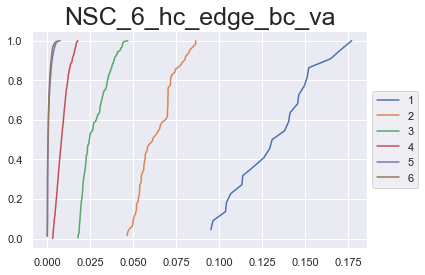

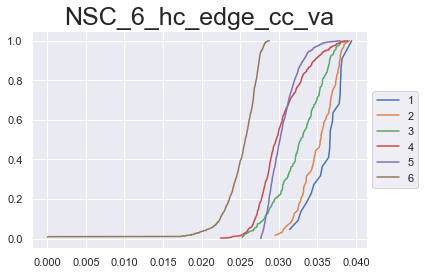

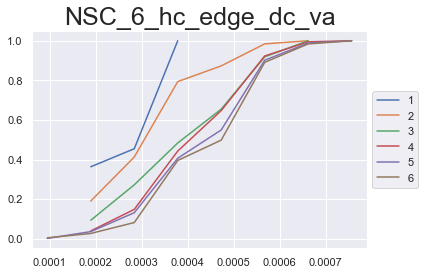

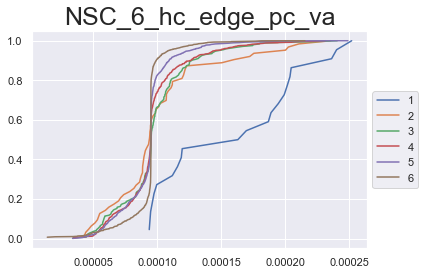

In [ ]:
dataSet = gdf_edges_city_centrality
col_name = 'NSC_6_hc'
dataIndex = [1, 2, 3, 4, 5, 6]
cen  = ['edge_bc_va', 'edge_cc_va', 'edge_dc_va', 'edge_pc_va']

dict1 = {}
dict2 = {}

# ===== Betweenness centrality
for j in range(0, len(cen)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(0, len(dataIndex)):
        df_cumulative  = dataSet.loc[dataSet[col_name] == dataIndex[i]]
        df_bc = pd.DataFrame(data=pd.Series(df_cumulative[cen[j]].values).sort_values(), columns=['bc'])

        stats_df = df_bc \
        .groupby('bc') \
        ['bc'] \
        .agg('count') \
        .pipe(pd.DataFrame) \
        .rename(columns = {'bc': 'frequency'})

        #### PDF
        stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

        ##### CDF
    #     stats_df['cdf'+'_'+ dataIndex[i]] = stats_df['pdf'].cumsum()
        stats_df['cdf'] = stats_df['pdf'].cumsum()

        stats_df1 = stats_df.reset_index()
    #     stats_df2 = stats_df['cdf'+'_'+ sgmt[i]]

        dict1[i] = pd.DataFrame()
        dict1[i] = stats_df1

        #####===== Plot ========================
        ax.plot(dict1[i]['bc'],dict1[i]['cdf'], label = dataIndex[i])
        ax.legend(loc='upper left', frameon=False)

    plt.title(col_name + '_' + cen[j], size = 25)
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# 11. Measure difference between two distribution (K-S test) : Cumulative distribution of frequency (CDF) of centrality of each classification (Fig. 5. Step 7)
https://stackoverflow.com/questions/52471839/measure-difference-between-two-distribution
1. A Kolmogorov-Smirnov test is a non-parametric test, that measures the "distance" between two cumulative/empirical distribution functions.
1.1 https://stats.stackexchange.com/questions/91436/kolmogorov-smirnov-test-for-two-sample-of-different-size)
1.2 https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5
1.3 https://github.com/vinyluis/Articles/tree/main/Kolmogorov-Smirnov

2. The Kullback-Leibler divergence measures the "distance" between two distributions in the language of information theory as a change in entropy.

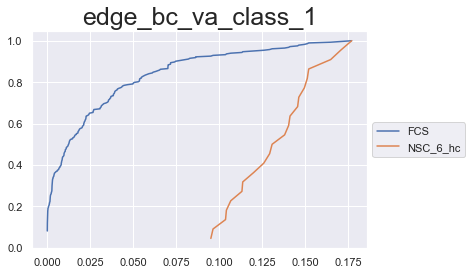

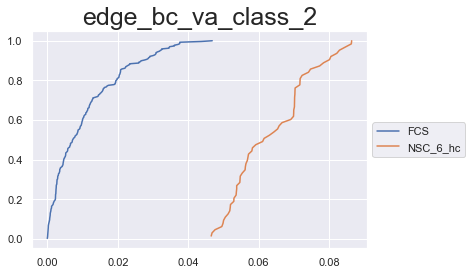

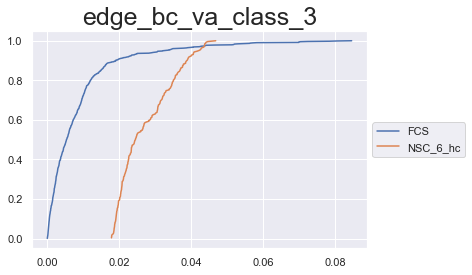

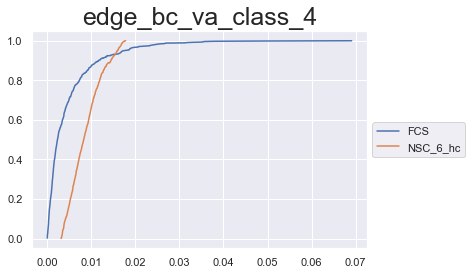

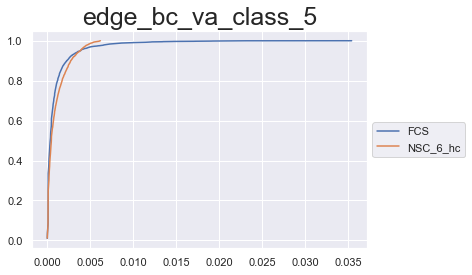

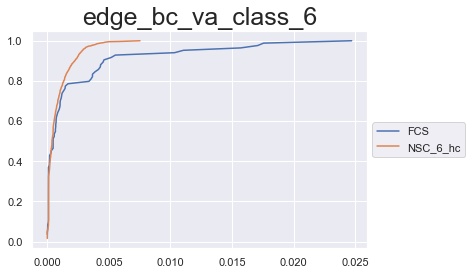

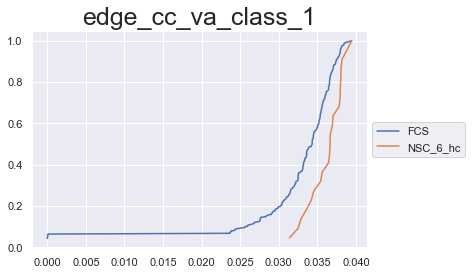

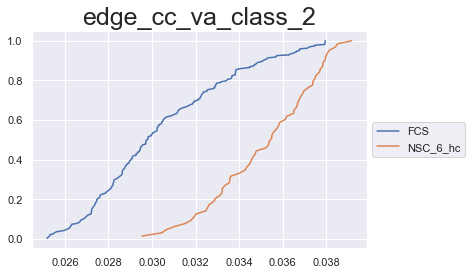

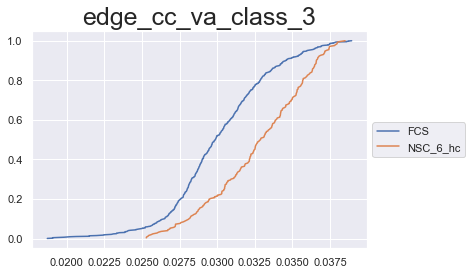

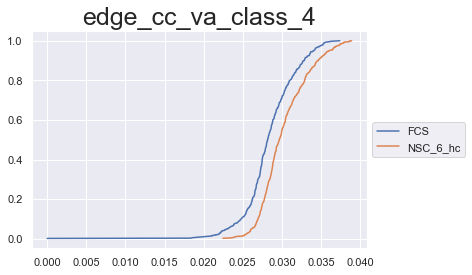

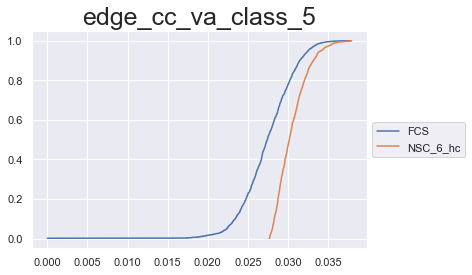

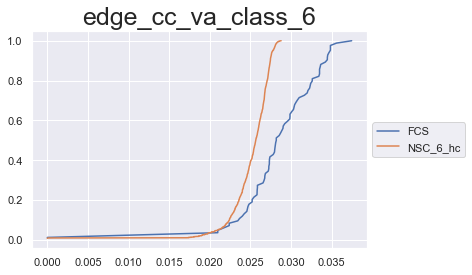

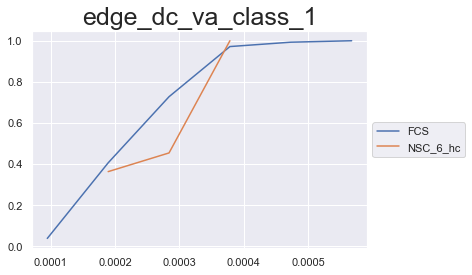

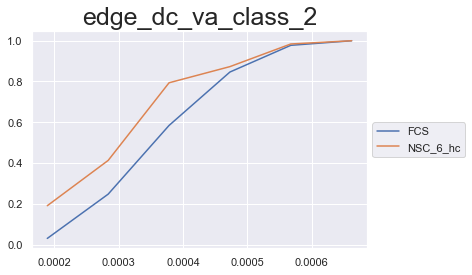

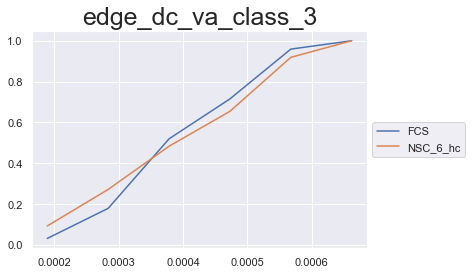

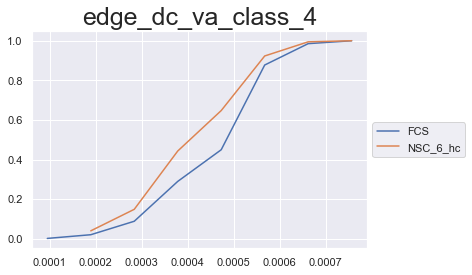

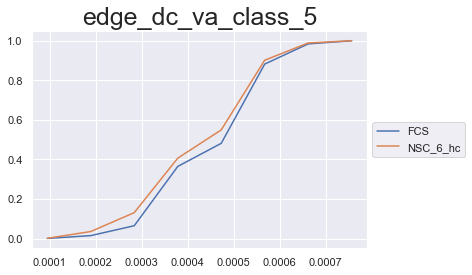

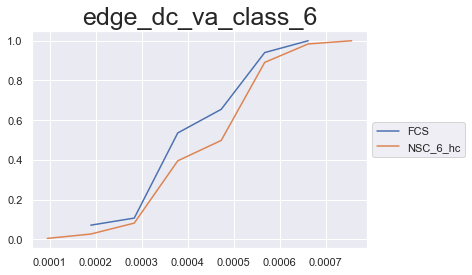

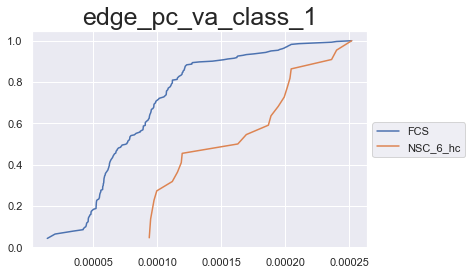

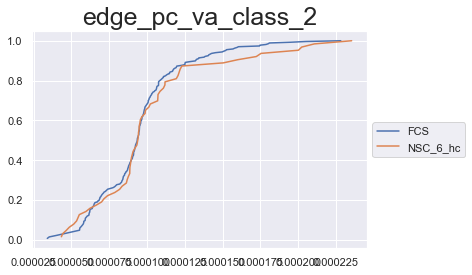

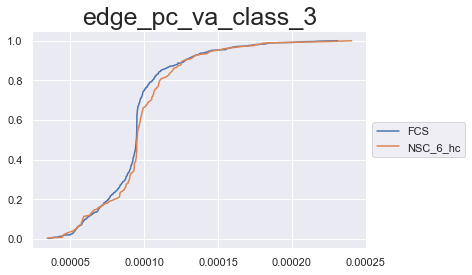

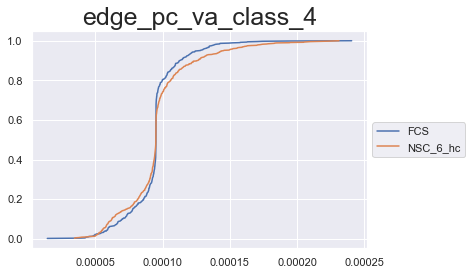

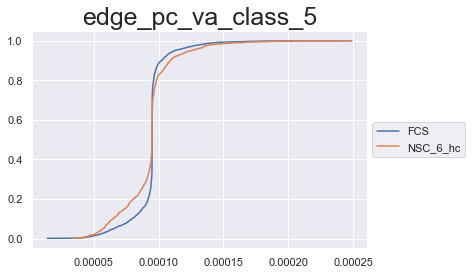

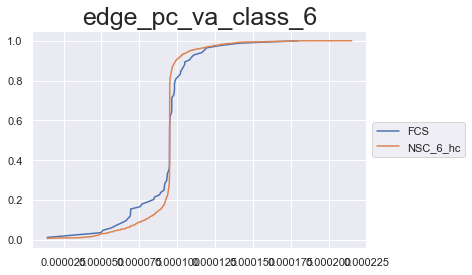

In [ ]:
dataSet = gdf_edges_city_centrality
col_name = ['FCS', 'NSC_6_hc']
dataIndex = [1, 2, 3, 4, 5, 6]
cen  = ['edge_bc_va', 'edge_cc_va', 'edge_dc_va', 'edge_pc_va']

dict1 = {}
dict2 = {}

for k in range(0,len(cen)):
    for j in range(0, len(dataIndex)):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for i in range (0, len(col_name)):
            df_cumulative  = dataSet.loc[dataSet[col_name[i]] == dataIndex[j]] # Select row in df by value of dataIndex
            df_bc = pd.DataFrame(data=pd.Series(df_cumulative[cen[k]].values).sort_values(), columns=['bc']) # select column series by cen

            stats_df = df_bc \
            .groupby('bc') \
            ['bc'] \
            .agg('count') \
            .pipe(pd.DataFrame) \
            .rename(columns = {'bc': 'frequency'})

            #### PDF
            stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

            ##### CDF
    #        stats_df['cdf'+'_'+ dataIndex[j]] = stats_df['pdf'].cumsum()
            stats_df['cdf'] = stats_df['pdf'].cumsum()

            stats_df1 = stats_df.reset_index()
    #        stats_df2 = stats_df['cdf'+'_'+ sgmt[i]]

            dict1[i] = pd.DataFrame()
            dict1[i] = stats_df1
        #####===== Plot ========================
            ax.plot(dict1[i]['bc'], dict1[i]['cdf'], label = col_name[i])
            ax.legend(loc='upper left', frameon=False)

        plt.title(cen[k] + '_class_' + str(dataIndex[j]), size = 25)
        plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()

In [ ]:
# ===== Using scipy.stats.ks_2samp to compare the distributions
from scipy.stats import ks_2samp
import numpy as np

dataSet = gdf_edges_city_centrality
cen  = ['edge_bc_va', 'edge_cc_va', 'edge_dc_va', 'edge_pc_va']
dataIndex = [1, 2, 3, 4, 5, 6]
col_name = ['FCS', 'NSC_6_hc']

for k in range(0, len(cen)):
    for j in range(0, len(dataIndex)):
        for i in range (0, len(col_name)):
            df_cumulative  = dataSet.loc[dataSet[col_name[i]] == dataIndex[j]]
#             print(df_cumulative)
            globals()["series_" + str(i)] =pd.Series(df_cumulative[cen[k]].values).sort_values()
#             print(globals()["series_" + str(i)])
        ks  = ks_2samp(series_0,series_1)
#         print(ks, ks.statistic, ks.pvalue)
        print(f"FCS vs NSC: ks = {ks.statistic:.4f} (p-value = {ks.pvalue:.3e}, are equal = {ks.pvalue > 0.05})")


FCS vs NSC: ks = 0.9223 (p-value = 5.551e-16, are equal = False)
FCS vs NSC: ks = 0.9963 (p-value = 0.000e+00, are equal = False)
FCS vs NSC: ks = 0.8914 (p-value = 4.441e-16, are equal = False)
FCS vs NSC: ks = 0.5736 (p-value = 2.998e-15, are equal = False)
FCS vs NSC: ks = 0.0945 (p-value = 8.212e-12, are equal = False)
FCS vs NSC: ks = 0.1875 (p-value = 5.560e-03, are equal = False)
FCS vs NSC: ks = 0.3996 (p-value = 1.887e-03, are equal = False)
FCS vs NSC: ks = 0.6146 (p-value = 0.000e+00, are equal = False)
FCS vs NSC: ks = 0.3521 (p-value = 4.441e-16, are equal = False)
FCS vs NSC: ks = 0.2415 (p-value = 2.998e-15, are equal = False)
FCS vs NSC: ks = 0.5299 (p-value = 5.551e-16, are equal = False)
FCS vs NSC: ks = 0.5360 (p-value = 3.331e-16, are equal = False)
FCS vs NSC: ks = 0.2734 (p-value = 7.688e-02, are equal = True)
FCS vs NSC: ks = 0.2094 (p-value = 1.918e-02, are equal = False)
FCS vs NSC: ks = 0.0926 (p-value = 7.159e-02, are equal = True)
FCS vs NSC: ks = 0.1979 (p-

### [TUTORIAL] Kolmogorov-Smirnov test :
#https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

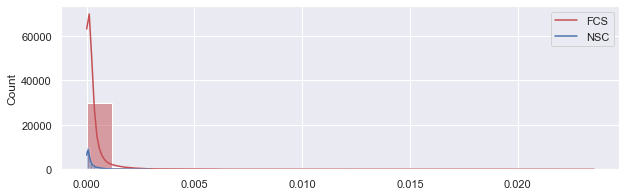

In [ ]:
dataSet = gdf_edges_city_centrality
series_0 = dataSet.loc[dataSet['FCS'] == 5]['edge_bc_va'].values
series_1 = dataSet.loc[dataSet['NSC_6_hc'] == 5]['edge_bc_va'].values


plt.figure(figsize = (10,3))
sns.histplot(series_0, bins = 20, kde = True, color = 'r')
sns.histplot(series_1, bins = 20, kde = True, color = 'b')

plt.legend(["FCS", "NSC"])

In [ ]:
# Creates their CDFs for visualization
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

dataSet = gdf_edges_city_centrality
series_0 = dataSet.loc[dataSet['FCS'] == 1]['edge_bc_va'].values
series_1 = dataSet.loc[dataSet['NSC_6_hc'] == 1]['edge_bc_va'].values

# cdf(series_0, series_0.mean())

cdf_norm_a = np.array([cdf(series_0, x, sort = True) for x in series_0])
cdf_norm_b = np.array([cdf(series_1, x, sort = True) for x in series_0])

# Illustrating the KS Statistic
plt.figure(figsize = (8,5))
sns.lineplot(x = series_0, y = cdf_norm_a, color = 'b')
sns.lineplot(x = series_1, y = cdf_norm_b, color = 'g')
min_x = int(min(min(norm_a), min(norm_b)))
max_x = int(max(max(norm_a), max(norm_b)))
for i in range(min_x * 3, max_x * 3):
    j = i/3
    plt.plot([j, j], [cdf(norm_a, j), cdf(norm_b, j)], color = 'r')
plt.legend(["Sample 1", "Sample 2", "KS Statistic"])
plt.title("Kolmogorov-Smirnov Test")

In [ ]:
# ===== percentage of observations below x on the sample:

dataSet = gdf_edges_city_centrality
series_0  = dataSet.loc[dataSet['FCS'] == 1]['edge_bc_va'].values

###### Counts how many observations are below x
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

cdf(series_0, series_0.mean())

0.7623862487360971

In [ ]:
# ===== Standardizing the samples
#It is important to standardize the samples before the test, or else a normal distribution with a different mean and/or variation (such as norm_c) will fail the test. We can now perform the KS test for normality in them:

def standardize(sample):

    # Standardize the data
    mean = sample.mean()
    std = sample.std()
    sample_z = (sample - mean)/std

    return sample_z

##### KS 1-sample test : check whether a sample is normally distributed

In [ ]:
# ===== 1st way: Using scipy.stats.ks_1samp for testing the normality

# Evaluates the KS test
ks_norm_a = stats.ks_1samp(x = standardize(series_0), cdf = stats.norm.cdf)
print(f"norm_a: ks = {ks_norm_a.statistic:.4f} (p-value = {ks_norm_a.pvalue:.3e}, is normal = {ks_norm_a.pvalue > 0.05})")

norm_a: ks = 0.2919 (p-value = 4.054e-75, is normal = False)


In [ ]:
# ===== 2nd way
# calculate the KS statistic comparing the CDF of the sample with the CDF of the normal distribution (with mean = 0 and variance = 1).

dataSet = gdf_edges_city_centrality
series_0  = dataSet.loc[dataSet['FCS'] == 1]['edge_bc_va'].values

def ks_norm(sample):
    # Sorts the sample
    sample.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    return {"ks_stat": ks_stat, "p_value" : p_value}

ks_norm(series_0)

{'ks_stat': 0.48179979777553084, 'p_value': 9.520666364510916e-212}

In [ ]:
ks_norm_a = ks_norm(standardize(series_0))
print(f"norm_a: ks = {ks_norm_a['ks_stat']:.4f} (p-value = {ks_norm_a['p_value']:.3e}, is normal = {ks_norm_a['p_value'] > 0.05})")

norm_a: ks = 0.2737 (p-value = 6.154e-66, is normal = False)


##### Evaluates the KS between two samples

In [ ]:
# ===== 1st way : Using scipy.stats.ks_2samp to compare the distributions
from scipy.stats import ks_2samp
import numpy as np

dataSet = gdf_edges_city_centrality
cen  = ['edge_bc_va', 'edge_cc_va', 'edge_dc_va', 'edge_pc_va']
dataIndex = [1, 2, 3, 4, 5, 6]
col_name = ['FCS', 'NSC_6_hc']

for k in range(0, len(cen)):
    for j in range(0, len(dataIndex)):
        for i in range (0, len(col_name)):
            df_cumulative  = dataSet.loc[dataSet[col_name[i]] == dataIndex[j]]
#             print(df_cumulative)
            globals()["series_" + str(i)] =pd.Series(df_cumulative[cen[k]].values).sort_values()
#             print(globals()["series_" + str(i)])
        ks  = ks_2samp(series_0,series_1)
#         print(ks, ks.statistic, ks.pvalue)
        print(f"FCS vs NSC: ks = {ks.statistic:.4f} (p-value = {ks.pvalue:.3e}, are equal = {ks.pvalue > 0.05})")


FCS vs NSC: ks = 0.9565 (p-value = 6.661e-16, are equal = False)
FCS vs NSC: ks = 0.9997 (p-value = 5.551e-16, are equal = False)
FCS vs NSC: ks = 0.9853 (p-value = 1.332e-15, are equal = False)
FCS vs NSC: ks = 0.0613 (p-value = 3.340e-12, are equal = False)
FCS vs NSC: ks = 0.0257 (p-value = 1.279e-06, are equal = False)
FCS vs NSC: ks = 0.2532 (p-value = 8.102e-14, are equal = False)
FCS vs NSC: ks = 0.6695 (p-value = 6.661e-16, are equal = False)
FCS vs NSC: ks = 0.6519 (p-value = 5.551e-16, are equal = False)
FCS vs NSC: ks = 0.3560 (p-value = 1.332e-15, are equal = False)
FCS vs NSC: ks = 0.5008 (p-value = 0.000e+00, are equal = False)
FCS vs NSC: ks = 0.3257 (p-value = 0.000e+00, are equal = False)
FCS vs NSC: ks = 0.9258 (p-value = 4.726e-267, are equal = False)
FCS vs NSC: ks = 0.2277 (p-value = 1.930e-02, are equal = False)
FCS vs NSC: ks = 0.7059 (p-value = 5.551e-16, are equal = False)
FCS vs NSC: ks = 0.3841 (p-value = 1.332e-15, are equal = False)
FCS vs NSC: ks = 0.1864 

In [ ]:
# ===== 2nd way

dataSet = gdf_edges_city_centrality
series_0 = dataSet.loc[dataSet['FCS'] == 1]['edge_bc_va'].values
series_1 = dataSet.loc[dataSet['NSC_6_hc'] == 1]['edge_bc_va'].values

def ks_2samp(sample1, sample2):
    # Gets all observations
    observations = np.concatenate((sample1, sample2))
    observations.sort()
    # Sorts the samples
    sample1.sort()
    sample2.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in observations:
        cdf_sample1 = cdf(sample = sample1, x  = x)
        cdf_sample2 = cdf(sample = sample2, x  = x)
        D_ks.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(len(sample1)), float(len(sample2))
    en = m * n / (m + n)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    return {"ks_stat": ks_stat, "p_value" : p_value}

ks = ks_2samp(series_0, series_1)

print(f"norm_a vs norm_b: ks = {ks['ks_stat']:.4f} (p-value = {ks['p_value']:.3e}, are equal = {ks['p_value'] > 0.05})")

norm_a vs norm_b: ks = 0.9565 (p-value = 5.581e-59, are equal = False)


# ========= Appendix =========

# 12. Deadend within each cat_hc

In [ ]:
len(gdf_edges_city_centrality.loc[(gdf_edges_city_centrality['NSC_6_hc']==5)
#                                 & (gdf_edges_city_centrality['value_stre'] == 1)
                                 ]
                               )

2297

# 13. Clustering analysis_KMeans without excluding deadend

### 10.1 =============== Elbow method ========================

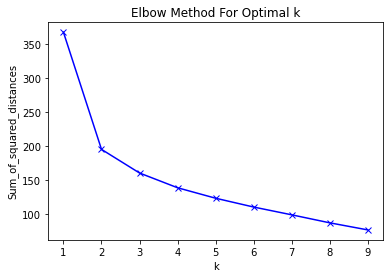

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ===== Define dataset
X = subset
X.shape

# ===== Define the model.
#=====continuous features
# To give equal importance to all features, we need to scale the continuous features. We will be using scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features . Other alternatives includes StandardScaler.
mms = MinMaxScaler()
# =====  Fit model
mms.fit(X)
# =====  Transform model
data_transformed = mms.transform(X)

Sum_of_squared_distances = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 10.2 KMeans Clustering

In [ ]:
num_clusters = 10

cluster_kmeans = KMeans(n_clusters=num_clusters)
cluster_kmeans.fit(X)
kmeans_labels = cluster_kmeans.fit_predict(X)
kmeans_labels
print(cluster_kmeans.cluster_centers_)

[[1.22703099e-03 3.15683542e-02 4.68519313e-04 9.24056487e-05]
 [6.11095954e-02 3.51731310e-02 3.52458864e-04 9.67644762e-05]
 [3.57446909e-02 3.31641139e-02 4.07262243e-04 1.01716028e-04]
 [1.45584391e-01 3.68577228e-02 3.15357931e-04 1.74764269e-04]
 [9.70718654e-04 2.75069655e-02 4.83531680e-04 9.27923772e-05]
 [8.68087916e-03 3.04765077e-02 4.56290961e-04 9.59019271e-05]
 [1.13281797e-05 2.27057711e-05 1.66508988e-04 1.57554481e-05]
 [9.19916744e-02 3.47414280e-02 3.19299905e-04 1.15853310e-04]
 [1.90545871e-02 3.22882353e-02 4.45680546e-04 9.80659899e-05]
 [6.47651776e-04 2.35218627e-02 4.83768707e-04 9.41979073e-05]]


### 10.3 Add cluster labels to gdf_edges

In [ ]:
#------Add a column of the clustering labels
gdf_edges_city_centrality['kmeans_label'] = kmeans_labels
gdf_edges_city_centrality.columns, gdf_edges_city_centrality['kmeans_label'].value_counts

(Index(['osmid', 'oneway', 'name', 'highway', 'length', 'speed_kph',
        'travel_tim', 'id_streets', 'value_stre', 'id_stree_1', 'value_st_1',
        'id_node_de', 'value_node', 'id_node__1', 'value_no_1', 'edge_cc_u_',
        'edge_cc_v_', 'edge_cc_va', 'edge_bc_u_', 'edge_bc_v_', 'edge_bc_va',
        'edge_dc_u_', 'edge_dc_v_', 'edge_dc_va', 'edge_pc_u_', 'edge_pc_v_',
        'edge_pc_va', 'edge_eic_u', 'edge_eic_v', 'edge_eic_1', 'from', 'to',
        'lanes', 'ref', 'maxspeed', 'width', 'est_width', 'bridge', 'junction',
        'tunnel', 'access', 'service', 'area', 'u', 'v', 'key', 'hc_label',
        'str_class', 'nuHighway', 'geometry', 'kmeans_label', 'NSC_km'],
       dtype='object'),
 <bound method IndexOpsMixin.value_counts of 0       5
 1       0
 2       5
 3       4
 4       0
        ..
 6257    0
 6258    4
 6259    4
 6260    0
 6261    4
 Name: kmeans_label, Length: 6262, dtype: int32>)

### 10.4 Relabel class (This step varies depending on the results of clustering)

In [ ]:
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==0,'NSC_km'] = int(5)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==1,'NSC_km'] = int(2)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==2,'NSC_km'] = int(1)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==3,'NSC_km'] = int(3)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==4,'NSC_km'] = int(7)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==5,'NSC_km'] = int(4)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==6,'NSC_km'] = int(8)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==7,'NSC_km'] = int(6)
gdf_edges_city_centrality['NSC_km'].value_counts()

7.0    2631
6.0    2457
5.0     710
4.0     253
3.0     109
2.0      57
8.0      25
1.0      20
Name: NSC_km, dtype: int64

In [ ]:
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==0,'NSC_10_km'] = int(7)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==1,'NSC_10_km'] = int(3)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==2,'NSC_10_km'] = int(4)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==3,'NSC_10_km'] = int(1)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==4,'NSC_10_km'] = int(8)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==5,'NSC_10_km'] = int(6)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==6,'NSC_10_km'] = int(10)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==7,'NSC_10_km'] = int(2)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==8,'NSC_10_km'] = int(5)
gdf_edges_city_centrality.loc[gdf_edges_city_centrality['kmeans_label']==9,'NSC_10_km'] = int(9)
gdf_edges_city_centrality['NSC_km'].value_counts()

7.0    2631
6.0    2457
5.0     710
4.0     253
3.0     109
2.0      57
8.0      25
1.0      20
Name: NSC_km, dtype: int64

# 14. Save file

In [ ]:
gdf_edges_city_centrality.to_file("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220809_KMeans clustering include deadend/km_10cat.shp")

# 15. Descriptive stats_of KMeans

In [ ]:
df_subset = gdf_edges_city_centrality [[ 'edge_bc_va', 'edge_cc_va', 'edge_dc_va',  'edge_pc_va', 'length',  'speed_kph', 'NSC_10_km']]

In [ ]:
# ===== Descriptive Statistic
dataSet_des_stats = df_subset
df_descriptive = pd.DataFrame()
num_clusters = 10

for i in range(1, num_clusters+1):  # Depending on how many clusters
    globals()["df_cluster_" + str(i)]= dataSet_des_stats.loc[dataSet_des_stats['NSC_10_km'] == i]
    for j in range(0, (len(dataSet_des_stats.columns)-1)):
        df_descriptive.loc[dataSet_des_stats.columns[j], 'mean_all'] = dataSet_des_stats[dataSet_des_stats.columns[j]].describe()['mean']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'std_all'] = dataSet_des_stats[dataSet_des_stats.columns[j]].describe()['std']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'mean_cluster_'+str(i)] =  globals()["df_cluster_" + str(i)][globals()["df_cluster_" + str(i)].columns[j]].describe()['mean']
        df_descriptive.loc[dataSet_des_stats.columns[j], 'std_cluster_'+str(i)] =  globals()["df_cluster_" + str(i)][globals()["df_cluster_" + str(i)].columns[j]].describe()['std']
df_descriptive

,mean_all,std_all,mean_cluster_1,std_cluster_1,mean_cluster_2,std_cluster_2,mean_cluster_3,std_cluster_3,mean_cluster_4,std_cluster_4,...,mean_cluster_6,std_cluster_6,mean_cluster_7,std_cluster_7,mean_cluster_8,std_cluster_8,mean_cluster_9,std_cluster_9,mean_cluster_10,std_cluster_10
edge_bc_va,0.004147,0.011594,0.145584,0.016276,0.091992,0.012733,0.061110,0.008100,0.035745,0.004998,...,0.008681,0.002365,0.001232,0.001317,0.000972,0.001176,0.000646,0.001039,0.000011,0.000024
edge_cc_va,0.028245,0.003982,0.036858,0.001631,0.034741,0.002623,0.035173,0.002332,0.033164,0.002762,...,0.030477,0.002934,0.031591,0.001656,0.027531,0.001105,0.023543,0.001688,0.000023,0.000041
edge_dc_va,0.000471,0.000127,0.000315,0.000092,0.000319,0.000119,0.000352,0.000123,0.000407,0.000133,...,0.000456,0.000122,0.000469,0.000129,0.000483,0.000125,0.000484,0.000114,0.000167,0.000079
edge_pc_va,0.000094,0.000021,0.000175,0.000054,0.000116,0.000038,0.000097,0.000039,0.000102,0.000036,...,0.000096,0.000026,0.000092,0.000020,0.000093,0.000018,0.000094,0.000011,0.000016,0.000003
length,137.870766,188.086505,893.419000,593.550882,659.748750,666.558117,375.730059,436.574975,296.241695,384.765852,...,179.965461,275.893320,118.179028,112.747712,120.893087,143.705888,112.051949,134.652991,201.859200,171.906419
speed_kph,38.928713,12.615757,80.000000,0.000000,72.918750,15.863132,67.368627,15.724191,58.872381,14.754533,...,47.309531,10.606095,38.600140,12.015888,36.074134,9.359633,33.355573,9.178062,62.536000,20.977744


In [ ]:
df_descriptive.to_csv("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220809_KMeans clustering include deadend/Tab2_descriptive_indicators.csv", index=True, encoding='utf-8')

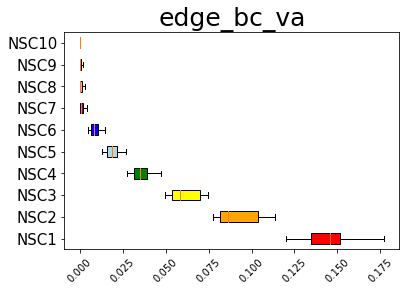

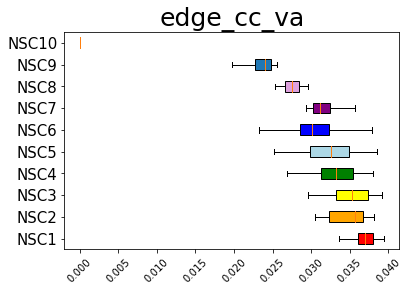

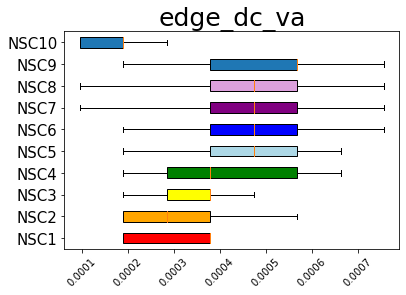

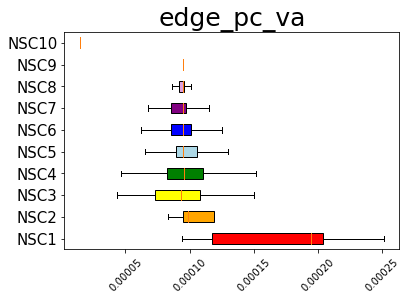

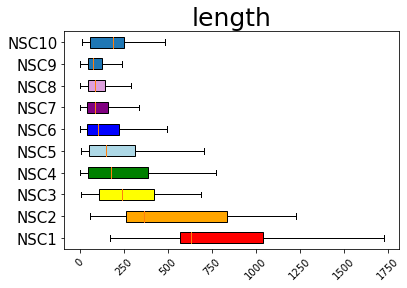

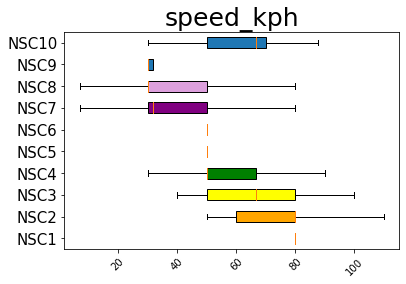

In [ ]:
# ===== Boxplot
dataSet_des_stats = df_subset
num_clusters = 10
num_target_variable = 2 # Choose how many target variables to rund descriptive stats
boxplot_labels = []
for i in range (1, num_clusters+1):
    boxplot_labels.append("NSC" + str(i))

for i in range(0, (len(dataSet_des_stats.columns)-1)): # -1 to remove the columns of 'cluster_label'
    boxplot_list = []
    dataSet_boxplot =  dataSet_des_stats[['NSC_10_km', dataSet_des_stats.columns[i]]] #Select the columns of target variable and cluster labels from dataSet
    for j in range(1, num_clusters+1): #Break the variable values by cluster labels
        globals()["df_cluster_" + str(j)] = dataSet_boxplot.loc[dataSet_boxplot['NSC_10_km'] == j] #Choose the rows with target cluster labels
        globals()["var_value_in_cluster_" + str(j)] = globals()["df_cluster_" + str(j)][dataSet_des_stats.columns[i]] # Choose column of target variable
        boxplot_list.append(globals()["var_value_in_cluster_" + str(j)])# List of values of target variable in each cluster

    box = plt.boxplot(boxplot_list, labels = boxplot_labels, vert=0, patch_artist=True
                    , showfliers=False
                    )

    colors = ['red', 'orange','yellow','green','lightblue', 'blue',  'purple', 'plum'  ]
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xticks(size =10, rotation = 45)
    plt.yticks(size =15)
    plt.title(dataSet_des_stats.columns[i], size = 25)
#     plt.savefig("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/box_plot_NSC_"+dataSet_des_stats.columns[i]+".png")
    plt.show()

# 16. Comparing functional-based vs network-based categorization_KMeas (Figure 3 & Supp table 2)

In [ ]:
# gdf_edges_city_centrality = gpd.read_file(
#     "C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/hc_8cat.shp"
#                 )

In [ ]:
# ===== Number of segments in each functional class
# # ===== Select specific sector
df_hway_0 = pd.Series()
dataSet_des_stats = gdf_edges_city_centrality[['nuHighway', 'NSC_10_km']]
sss = dataSet_des_stats['NSC_10_km'].replace(100, 4) # Assign new kmeans_label to deadend
num_clusters = len(gdf_edges_city_centrality['NSC_10_km'].value_counts().index)

lab = []
for k in range (1, num_clusters+1):
    lab.append("NSC_"+ str(k))

for i in range (1, num_clusters+1):
    hw1= dataSet_des_stats.loc[dataSet_des_stats['NSC_10_km'] == i]
    hw2 = hw1['nuHighway'].value_counts() # count number of segments in each functional class
    df_hway_0 = pd.concat([df_hway_0,  hw2], axis=1)

# ===== Change column name
    df_hway_0.rename({'nuHighway': 'NSC_'+ str(i)}, inplace=True, axis='columns')

# ===== Fill Nan with 0
df_hway_0= df_hway_0.fillna(0)

# ===== Drop the first column
df_hway_0.drop(0, inplace=True, axis=1)

# ===== Change the order of row
df_hway_0 = df_hway_0.reindex(["motorway", "primary", "secondary","tertiary", "residential","unclassified"])

df_hway_0

<ipython-input-74-2a1c43f7e20c>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_hway_0 = pd.Series()


,NSC_1,NSC_2,NSC_3,NSC_4,NSC_5,NSC_6,NSC_7,NSC_8,NSC_9,NSC_10
motorway,15.0,13.0,32.0,34.0,45,39,69,11,7,18.0
primary,0.0,0.0,0.0,27.0,49,74,40,76,1,0.0
secondary,0.0,3.0,15.0,35.0,82,292,170,193,39,0.0
tertiary,0.0,0.0,2.0,7.0,49,154,126,313,98,1.0
residential,0.0,0.0,0.0,1.0,17,97,987,1826,1093,5.0
unclassified,0.0,0.0,0.0,0.0,4,3,30,30,16,1.0


In [ ]:
# df_hway_0.to_csv('./data/journal/Supp tab2.csv', index=True, encoding='utf-8')
df_hway_0.to_csv("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/Supp tab2.csv", index=True, encoding='utf-8')

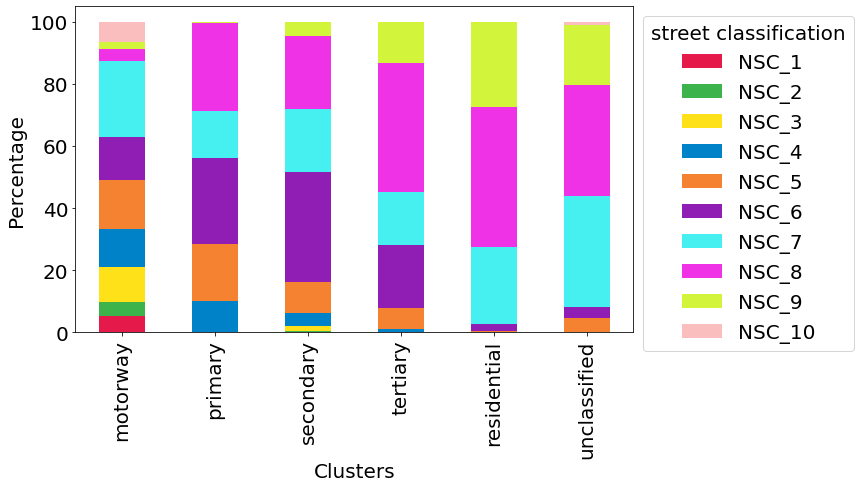

C:\Users\a\Anaconda\envs\ox\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


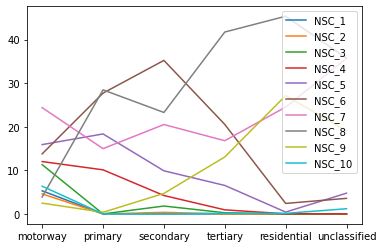

In [ ]:
# ===== Percentage of cluster within each hway type
data_stack_bar = df_hway_0

# ===== types of highway within each cluster
types_highway = len(data_stack_bar.index)
num_df_hway_clmn = len(data_stack_bar.columns)
num_cluster = len(gdf_edges_city_centrality['NSC_10_km'].value_counts().index)

snum = 0
for j in range(0, num_cluster):
        globals()["y" + str(j)] = data_stack_bar.iloc[:, j]
        snum = snum + globals()["y" + str(j)]

# # ===== normalization
for j in range(0, num_cluster):
        globals()["y" + str(j)] = globals()["y" + str(j)]/snum*100
#=================================
data_keys =[]
data_values =[]
# data = {}
for i in range(0, num_cluster):
    d_k =  data_stack_bar.columns[i]
    d_v =  globals()["y" + str(i)]
    data_keys.append(d_k)
    data_values.append(d_v)
data_keys
data_values

data = dict(zip(data_keys, data_values))
data

#================

X_AXIS = data_stack_bar.index

color_list = [
#              "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0","#f032e6",
#              '#9418e6','#16914c' ,'#ff7f00','#4682b4','#e31a1c','#7cbcee','#f299a9','#90ee90',
#              'cyan', 'lightblue', 'lightgreen', 'tan', 'yellow', 'orange', 'pink', "steelblue",

              "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0","#f032e6"
             , "#d2f53c", "#fabebe", "#008080", "#e6beff", "#aa6e28", "#fffac8", "#800000", "#aaffc3"
             , "#808000", "#ffd8b1", "#000080", "#808080", "#ffffff", "#000000"

             ]

index = pd.Index(X_AXIS, name='Clusters')
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6)
             , color = color_list
            )
ax.set_xlabel('Clusters', fontsize = 20)
ax.set_ylabel('Percentage', fontsize =20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(
            title='street classification', title_fontsize='20',
           bbox_to_anchor=(1.0, 1), loc='upper left', fontsize = 20
          )

# ====== Save
# # plt.savefig('stacked.png')  # if needed
# plt.savefig("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/NSC_in_function.png"
#            ,bbox_inches='tight', dpi=300)

plt.show()

# ===== Plot line chart
df_line =  pd.DataFrame(
    data
)
lines = df_line.plot.line()

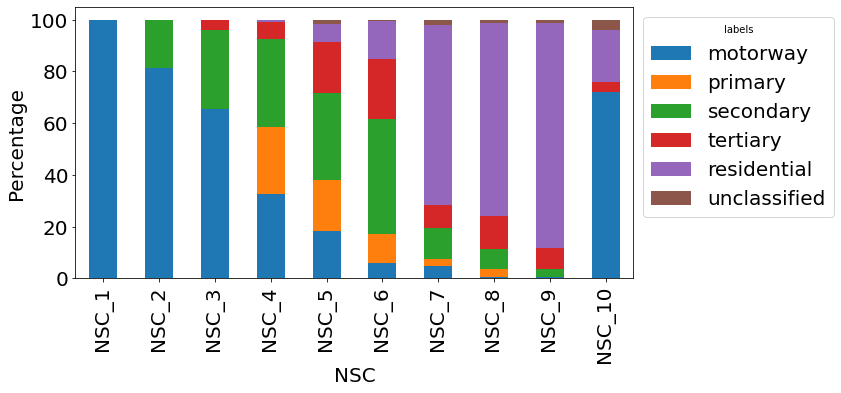

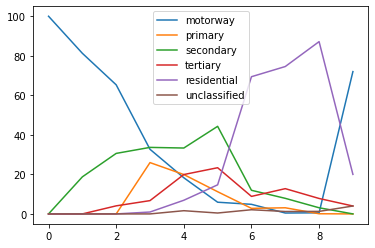

In [ ]:
# ===== Percentage of highway type within each cluster

data_stack_bar = df_hway_0

types_highway = len(data_stack_bar.index)     #"unclassified" is included
#types_highway = len(data_stack_bar.index)-1  #"unclassified" is excluded

num_df_hway_clmn = len(data_stack_bar.columns)

# ===== Sum of each column
snum = 0
for j in range(0, types_highway):
        globals()["y" + str(j)] = data_stack_bar.values[j]
        snum = snum + globals()["y" + str(j)]

# # ===== normalization: percentate of highway type within each cluster
for j in range(0, types_highway):
        globals()["y" + str(j)] = globals()["y" + str(j)]/snum*100

#=====Create a dataset with percentage of highway type within each cluster
data_keys =[]
data_values =[]
for i in range(0, types_highway):
    d_k =  data_stack_bar.index[i]
    d_v =  globals()["y" + str(i)]
    data_keys.append(d_k)
    data_values.append(d_v)
data_keys
data_values

data_percentage_hway_in_cluster = dict(zip(data_keys, data_values))

#===== Plot Percentage stacked bar chart===========

X_AXIS = data_stack_bar.columns

color_list = [
             "#e6194b", "#3cb44b", "#ffe119", "#0082c8", "#f58231", "#911eb4", "#46f0f0","#f032e6"
            , "#d2f53c", "#fabebe", "#008080", "#e6beff", "#aa6e28", "#fffac8", "#800000", "#aaffc3"
            , "#808000", "#ffd8b1", "#000080", "#808080", "#ffffff", "#000000"
            ]

index = pd.Index(X_AXIS, name='Clusters')
df = pd.DataFrame(data_percentage_hway_in_cluster, index=index)
ax = df.plot(kind='bar', stacked=True, figsize=(10, 5),
#              color = color_list
            )
ax.set_xlabel('NSC', fontsize = 20)
ax.set_ylabel('Percentage', fontsize =20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.legend(title='labels', bbox_to_anchor=(1.0, 1), loc='upper left', fontsize =20)

# ==== Save
# plt.savefig('stacked.png')  # if needed
# plt.savefig("C:/Users/a/Desktop/2021 ISU/BeSt/20210829_" +city_name + "/20220705_hierarchical clustering include deadend/function_in_NSC.png"
#            ,bbox_inches='tight', dpi=300)
# plt.gcf().set_size_inches(10,5)
# plt.tight_layout()
# plt.gca().set_position([0, 0, 1, 1])

plt.show()

# ===== Plot line chart
df_line =  pd.DataFrame(
    data_percentage_hway_in_cluster
)
lines = df_line.plot.line()

# 17. Cumulative distribution of each centralities value (Figure 4)

### 13.1 Functional-based categorization

In [ ]:
sgmt = ['motorway', 'primary','secondary','tertiary','residential']
dataSet_des_stats = concat_df

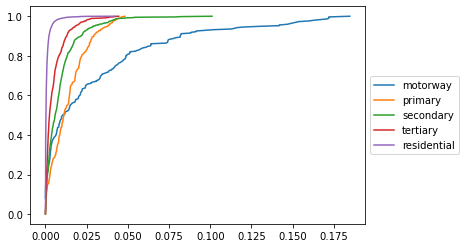

In [ ]:
# ===== Betweenness centrality
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}

highWayTag = ["motorway", "primary","secondary","tertiary","residential"]
for i in range(0, len(highWayTag)):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['nuHighway'] == highWayTag[i]]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_bc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ sgmt[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ sgmt[i]]

    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

    #####===== Plot ========================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ sgmt[i]], label = sgmt[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

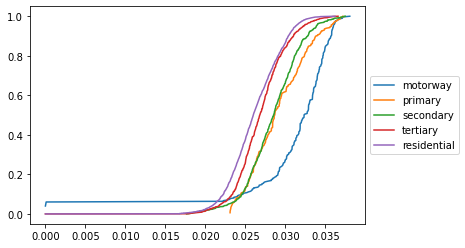

In [ ]:
# ====== Closeness centrality
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}
highWayTag = ["motorway", "primary","secondary","tertiary","residential"]
for i in range(0, len(highWayTag)):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['nuHighway'] == highWayTag[i]]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_cc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ sgmt[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ sgmt[i]]

    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

    #####===== Plot ========================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ sgmt[i]], label = sgmt[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

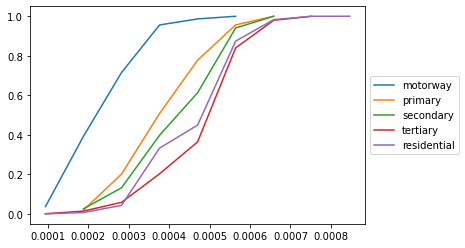

In [ ]:
# ===== Degreeness centrality
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}

highWayTag = ["motorway", "primary","secondary","tertiary","residential"]
for i in range(0, len(highWayTag)):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['nuHighway'] == highWayTag[i]]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_dc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ sgmt[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ sgmt[i]]

    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

     #####===== Plot ========================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ sgmt[i]], label = sgmt[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

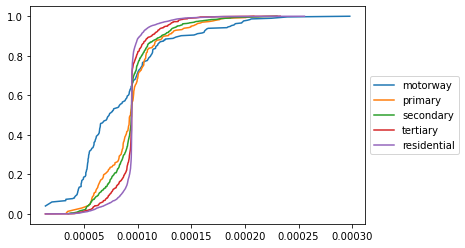

In [ ]:
# ===== Pagerank centrality
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}

highWayTag = ["motorway", "primary","secondary","tertiary","residential"]
for i in range(0, len(highWayTag)):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['nuHighway'] == highWayTag[i]]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_pc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ sgmt[i]] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ sgmt[i]]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

    #####=====Plot =========================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ sgmt[i]], label = sgmt[i])
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### 13.2 Network-based categorization

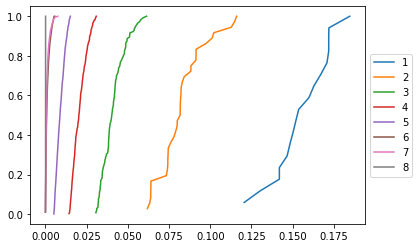

In [ ]:
# ===== Betweenness centrality
dataSet_des_stats = df_subset
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}

num_clusters = 8
for i in range(1, num_clusters+1):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['str_class'] == i]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_bc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ "i"] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ "i"]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

    #####=======Plot=======================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ "i"], label = str(i))
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

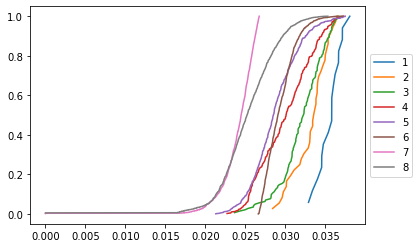

In [ ]:
# ===== Closeness centrality
dataSet_des_stats = df_subset
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}

num_clusters = 8
for i in range(1, num_clusters+1):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['str_class'] == i]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_cc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ "i"] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ "i"]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

#     df1=df1.append(stats_df1,ignore_index=True) ####Vertically adding cases #https://stackoverflow.com/questions/28669482/appending-pandas-dataframes-generated-in-a-for-loop
#     df2=df2.append(stats_df2,ignore_index=True) ####Vertical adding rows
#     df3[ cities[i] + '_' + str(i)] = stats_df2 #####Horizonally adding columns

#     ar1.append(stats_df2)
    #####==============================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ "i"], label = str(i))
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


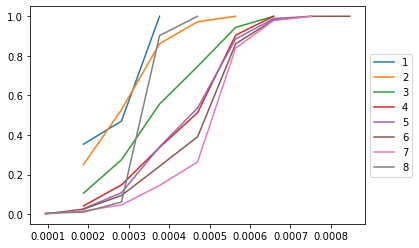

In [ ]:
# ===== DC
dataSet_des_stats = df_subset
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}

num_clusters = 8
for i in range(1, num_clusters+1):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['str_class'] == i]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_dc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ "i"] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ "i"]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

    #####==============================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ "i"], label = str(i))
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

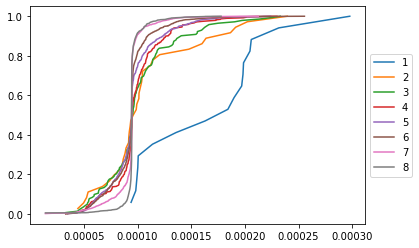

In [ ]:
# ===== Pagerank centrality
dataSet_des_stats = df_subset
fig = plt.figure()
ax = fig.add_subplot(111)

dict1 = {}
dict2 = {}

num_clusters = 8
for i in range(1, num_clusters+1):
    df_highway  = dataSet_des_stats.loc[dataSet_des_stats['str_class'] == i]
    df_bc = pd.DataFrame(data=pd.Series(df_highway['edge_pc_value_city'].values).sort_values(), columns=['bc'])

    stats_df = df_bc \
    .groupby('bc') \
    ['bc'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'bc': 'frequency'})

    #### PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    ##### CDF
    stats_df['cdf'+'_'+ "i"] = stats_df['pdf'].cumsum()
    stats_df['cdf'] = stats_df['pdf'].cumsum()

    stats_df1 = stats_df.reset_index()
    stats_df2 = stats_df['cdf'+'_'+ "i"]

    #####==============================
    dict1[i] = pd.DataFrame()
    dict1[i] = stats_df1

    #####==============================
    ax.plot(dict1[i]['bc'],dict1[i]['cdf'+'_'+ "i"], label = str(i))
    ax.legend(loc='upper left', frameon=False)

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()